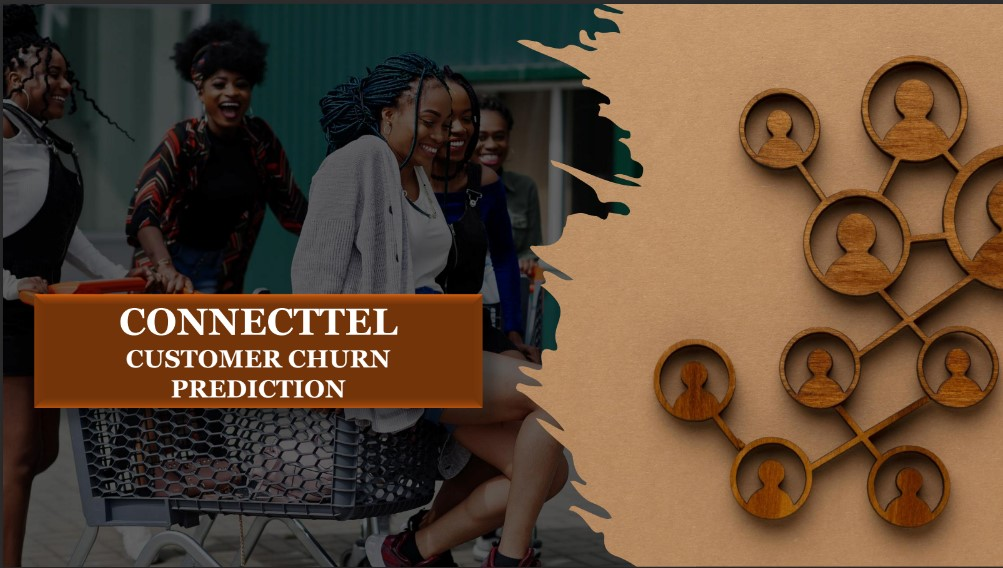


## Background
----
<span style="font-size: larger;">
    
    
**ConnectTel** is a leading telecommunications company at the forefront of innovation and connectivity solutions. With a strong presence in the global market, ConnectTel has established itself as a trusted provider of reliable voice, data, and Internet services. 

Offering a comprehensive range of telecommunications solutions, including mobile networks, broadband connections, and enterprise solutions, ConnectTel caters to both individual and corporate customers, they are committed to providing exceptional customer service and cutting-edge technology.ConnectTel ensures seamless communication experiences for millions of users worldwide. 

Through strategic partnerships and a customer-centric approach, ConnectTel continues to revolutionize the telecom industry, empowering individuals and businesses to stay connected and thrive in the digital age.</span> 


## Problem Statement
----
<span style="font-size: larger;">



**ConnectTel Telecom Company** faces the pressing need to address
customer churn, which poses a significant threat to its business
sustainability and growth.

The company's current customer retention strategies lack precision and
effectiveness, resulting in the loss of valuable customers to competitors.
To overcome this challenge, **ConnectTel** aims to develop a
robust customer churn prediction system for which you have been contacted
to handle as a Data Scientist. By leveraging advanced analytics and machine
learning techniques on available customer data, the company seeks to
accurately forecast customer churn and implement targeted retention
initiatives.

This proactive approach will enable ConnectTel to reduce customer
attrition, enhance customer loyalty, and maintain a competitive edge in the
highly dynamic and competitive telecommunications industry. </span> 

## Data Dictionary
----

<div style="line-height: 2;">
1. CustomerID: A unique identifier assigned to each telecom customer, enabling
tracking and identification of individual customers.

2. Gender: The gender of the customer, which can be categorized as male, or
female. This information helps in analyzing gender-based trends in
customer churn.

3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen
or not. This attribute helps in understanding if there are any specific
churn patterns among senior customers.

4. Partner: Indicates whether the customer has a partner or not. This attribute helps
in evaluating the impact of having a partner on churn behavior.

5. Dependents: Indicates whether the customer has dependents or not. This attribute
helps in assessing the influence of having dependents on customer
churn.

6. Tenure: The duration for which the customer has been subscribed to the telecom
service. It represents the loyalty or longevity of the customer’s
relationship with the company and is a significant predictor of churn.

7. PhoneService: Indicates whether the customer has a phone service or not. This attribute
helps in understanding the impact of phone service on churn.

8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing
the effect of having multiple lines on customer churn.

9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic,
or no internet service. It helps in evaluating the relationship between internet service and churn.

10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in
analyzing the impact of online security on customer churn.

11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in
evaluating the impact of online backup on churn behavior.

12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps
in understanding the influence of device protection on churn.

13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps
in assessing the impact of tech support on churn behavior.

14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in
evaluating the impact of streaming TV on customer churn.

15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.

16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.

17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.

18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.

19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.

20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.

21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.
 </div>

-----
## Task 1: Problem definition
-----
<span style="font-size: larger;">Connectell is currently grappling with a customer churn issue, with initial analysis revealing that 25% of their customer base has already discontinued their services. This has unquestionably had a significant impact on Connectell's revenue. The main aim of this analysis is to harness business data and publicly accessible information to evaluate Connectell's offerings. The objective is to discern the factors contributing to customer attrition and employ machine learning algorithms to forecast potential churn based on existing data patterns. This examination will empower the company to pinpoint crucial predictor variables and undertake proactive measures to devise and execute effective strategies, with the ultimate goal of minimizing customer churn as much as possible.</span> 

<div style="line-height: 2;">

</div>



---
## Task 2 - DATA ANALYSIS 
---

### 2.1. Import Libraries
---

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
from keras.models import Sequential    # The model class is Sequentially arranged 
from keras.layers import Dense, Dropout  # Dense indicates fully connected networks
from keras.losses import mean_squared_error  # loss 
from keras.optimizers import SGD # Evaluation metric
from keras.metrics import mean_squared_error         # Evaluation metric
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

### 2.2. Loading data with Pandas
---

In [2]:
df_churn = pd.read_csv("Customer-Churn - Customer-Churn.csv")

In [3]:
df_churn.head() #Quick Glance on the data

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

This glance through has revealed that the data comprises majorly of categorial data and fewer numeric data

In [4]:
df_churn.shape

(7043, 21)

- The dataset consists of `21` columns and `7043 rows`

### 2.3. Descriptive Statistics of the Churn Dataset

#### Data Types 

In [5]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

From the types:
- All data except "Senior Citizen", "tenure", "Monthly Charges", "Total Charges" are numerical data while others are categorical.
- It is useful for understanding the nature of each feature in the dataset, as it provides information on whether a column contains numerical data (integers or floats) or categorical data (objects). It's a crucial step in the data analysis process to ensure appropriate data preprocessing and modeling techniques are applied based on the nature of the data.

#### Dataset Description

In [6]:
df_churn.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

##### - There are total counts of 7043 entries across the dataset
- 25% of the customers has a tenure of 9 months with monthly charges and total charges valued at 35.5 and 401.45 respectively
- 50% of the customers has a tenure of 29 months with monthly charges and total charges valued at 70.35 and 1397.48 respectively
- 75% of the customers has a tenure of 55 months with monthly charges and total charges valued at 89.85 and 3794.74 respectively
- The tenure's standard deviation, approximately 24.56, suggests a considerable spread in customer subscription durations. Moreover, the standard deviation of approximately 30.09 reflects variability in monthly charges, while the standard deviation of approximately 2266.77 indicates significant variability in total charges.
- The average tenure period is 32.37 months
- The average monthly charges across the distribution is 64.76 while the average total charges is 2283.30


In [7]:
df_churn.describe(include = 'object').T

count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
Churn             7043      2                No  5174

- Object data description showed that all data are unique based on the customer ID

#### Checking for Missing Values (Null Data Analysis)
---

In [8]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It could be seen that there are 11 missing values in column 'Total Charges'; which calls for investigation.

In [9]:
df_churn['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [10]:
#Replacing the missing values with most common denominator as mode being the most occuring value within the column distribution
mode_value = df_churn['TotalCharges'].mode()
#Filling up
mode_value

0    20.2
Name: TotalCharges, dtype: float64

In [11]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(20.2)

In [12]:
df_churn.isnull().sum()  #to confirm the filling task done

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df_churn['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

---
### 2.4 EXPLORATORY DATA ANALYSIS AND VISUALIZATION
---

<AxesSubplot: >

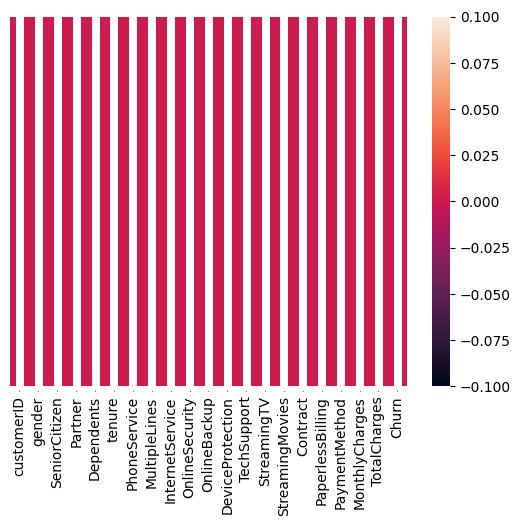

In [15]:
sns.heatmap(df_churn.isnull(), yticklabels = False, annot = True)

###### ANALYSE RELATIONSHIP BETWEEN DIFFERENT FEATURES IN THE COLUMN AND THE CHURN

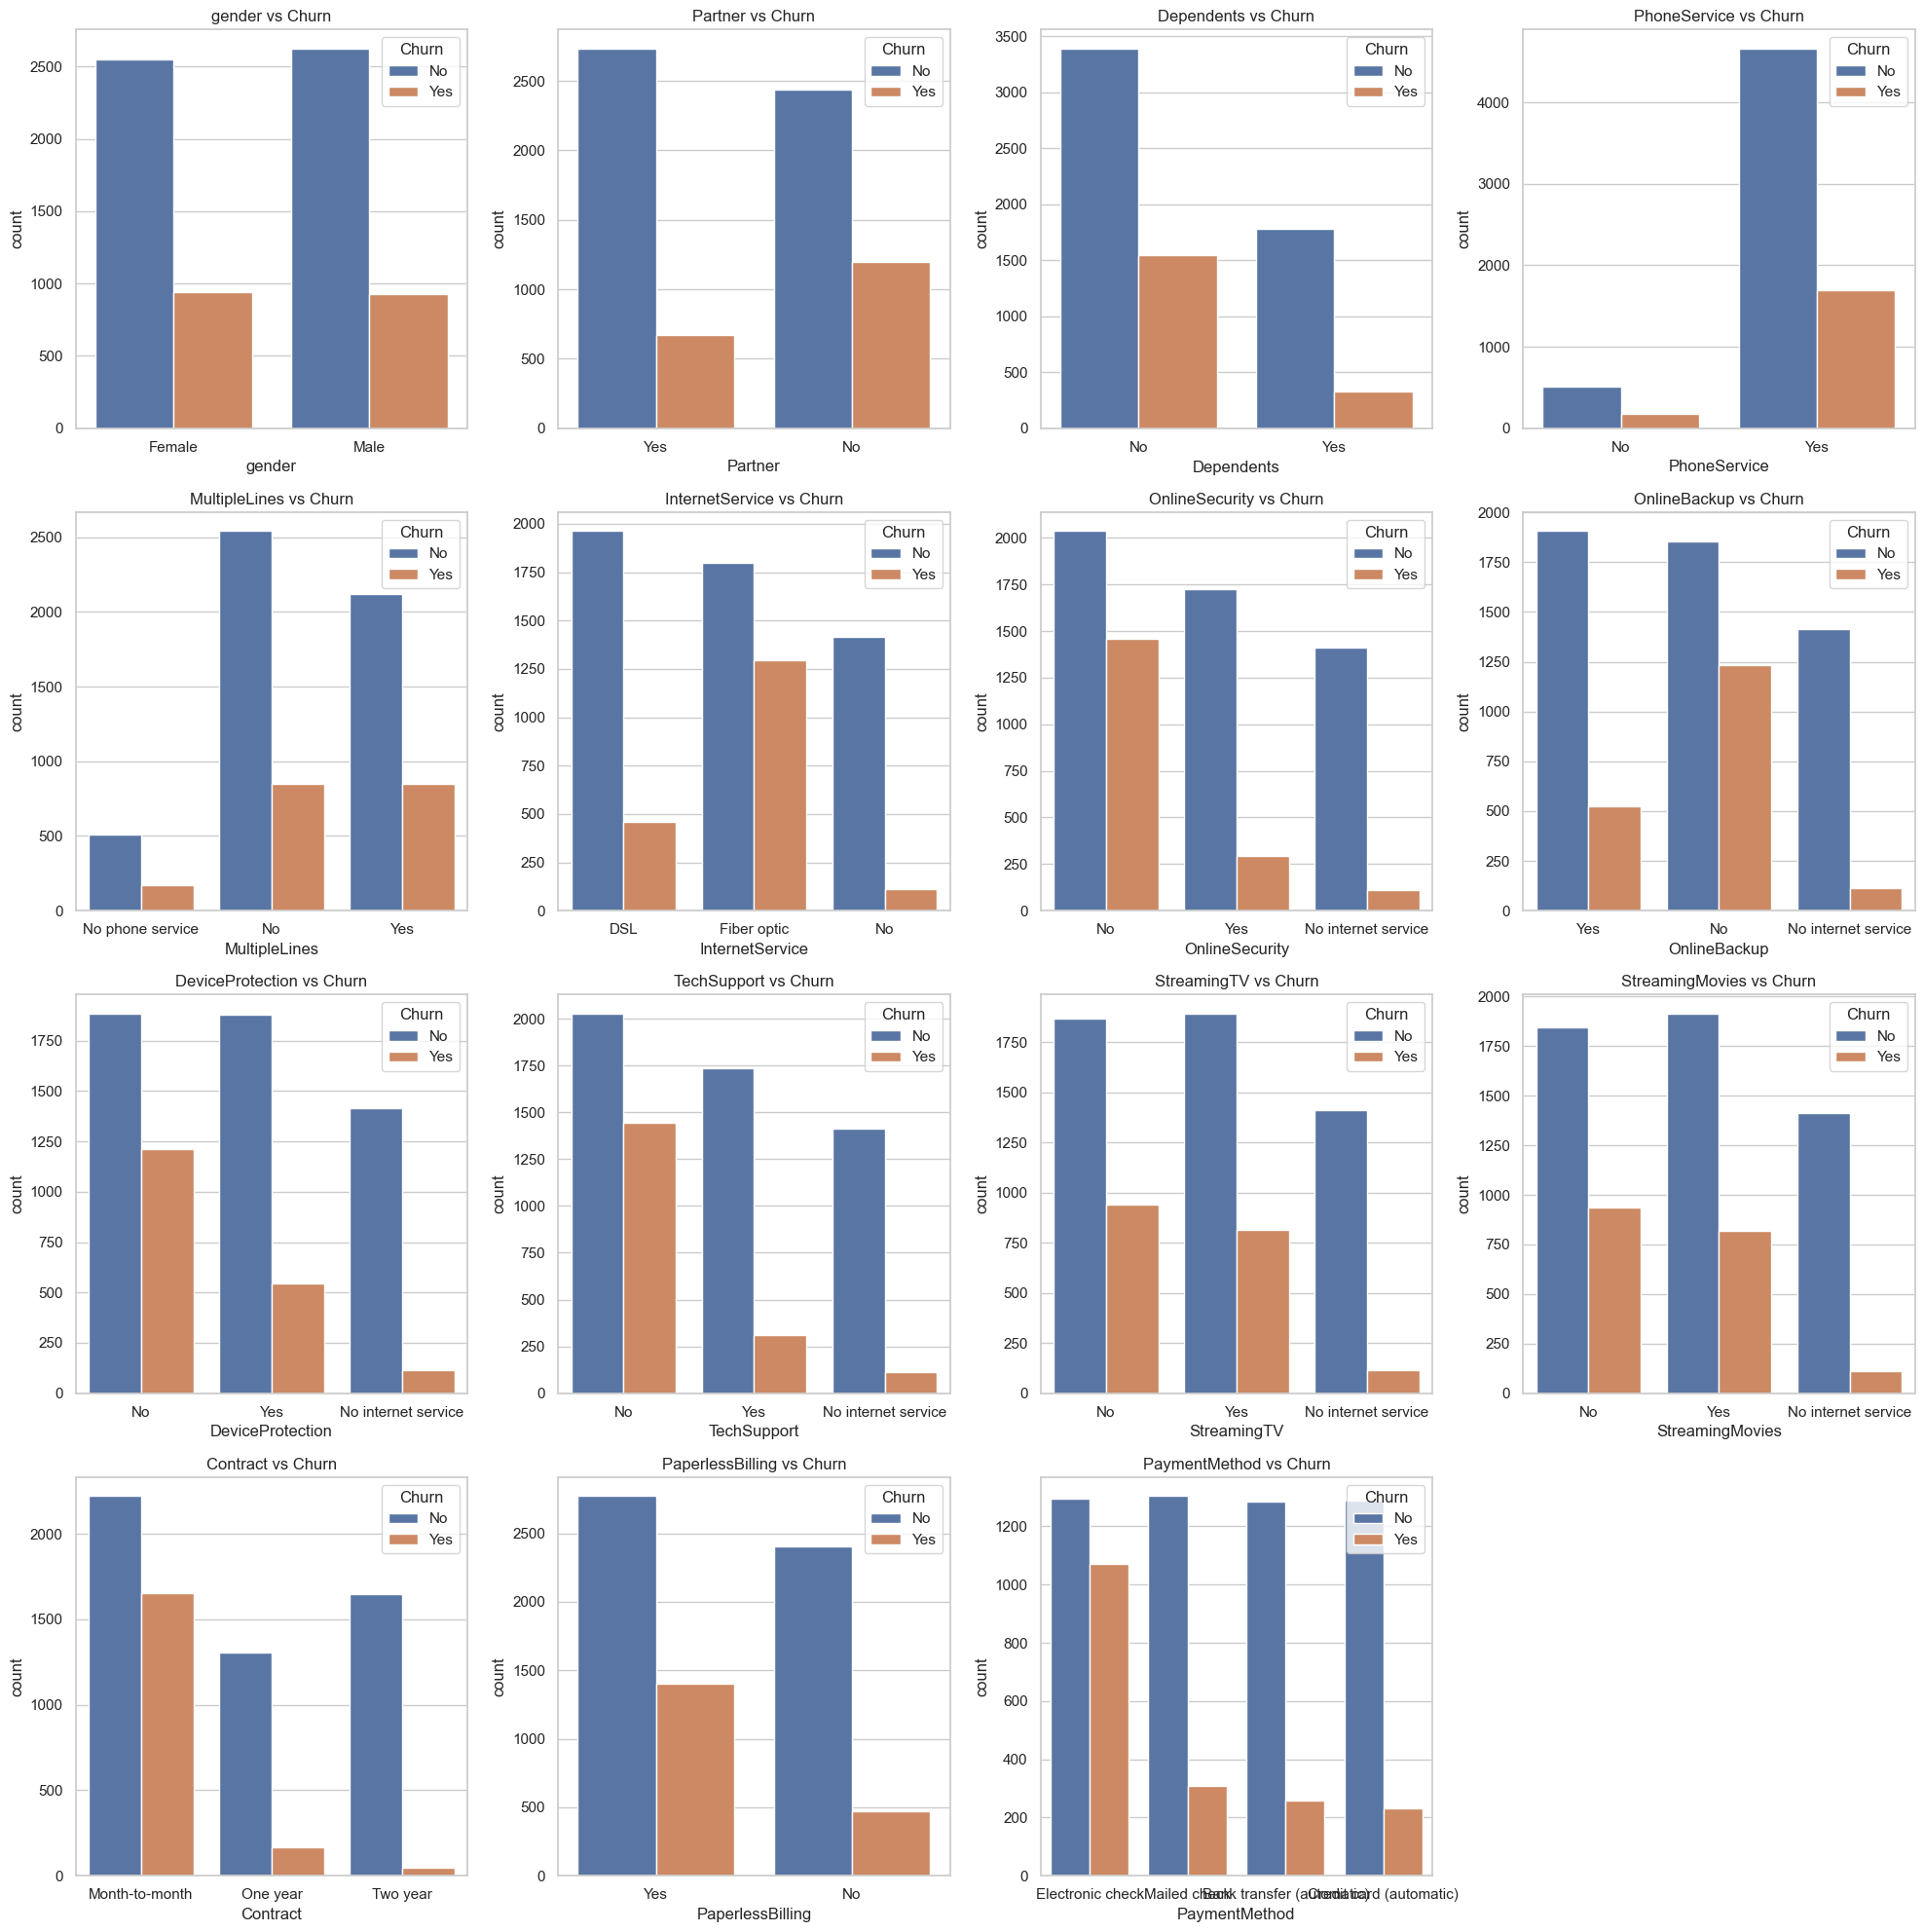

In [16]:
# Set the style for the plots
sns.set(style="whitegrid")

# Analyze relationships between categorical features and churn
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plot countplots for each categorical feature
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, hue='Churn', data=df_churn)
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()



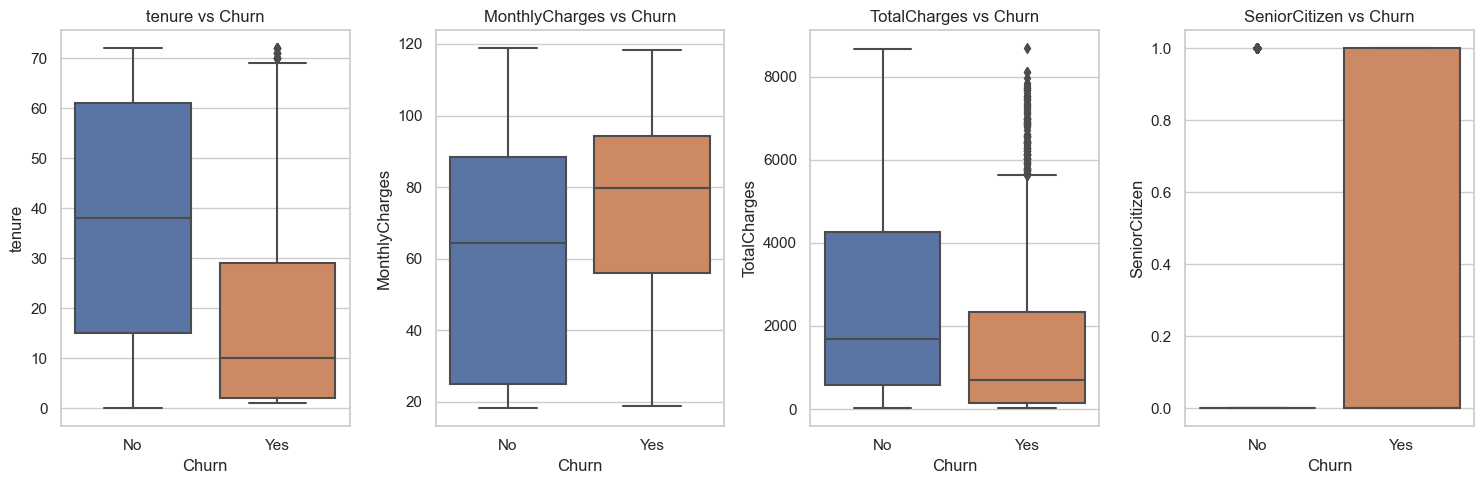

In [17]:
# Analyze relationships between numerical features and churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Churn', y=feature, data=df_churn)
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()


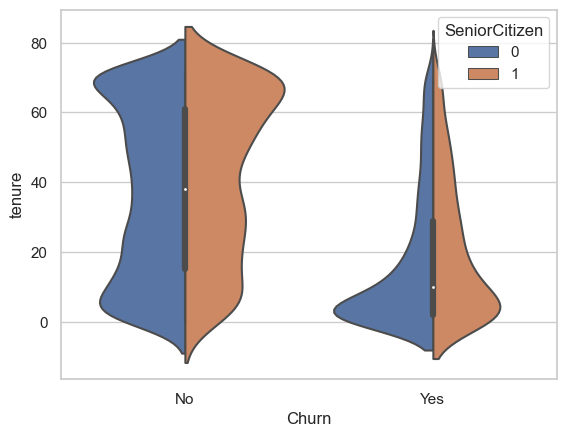

In [18]:
# Create a violin plot
sns.violinplot(data=df_churn, x='Churn', y='tenure', hue='SeniorCitizen', split=True)

# Show the plot
plt.show()

<AxesSubplot: xlabel='SeniorCitizen', ylabel='tenure'>

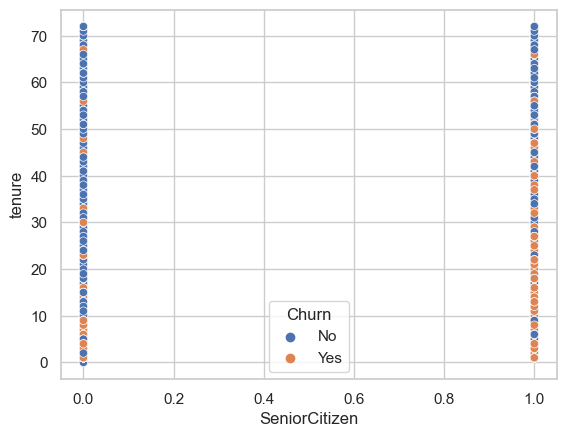

In [19]:
sns.scatterplot(data  = df_churn, x ='SeniorCitizen', y = 'tenure',hue ='Churn' )

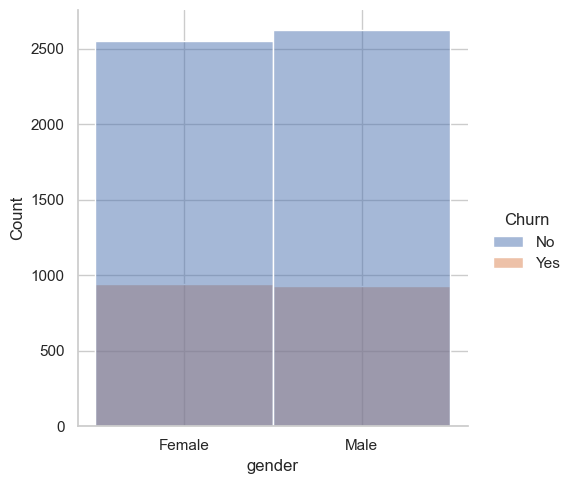

In [20]:
sns.displot(data=df_churn, x='gender', hue='Churn', binwidth=5)

<AxesSubplot: xlabel='TotalCharges', ylabel='tenure'>

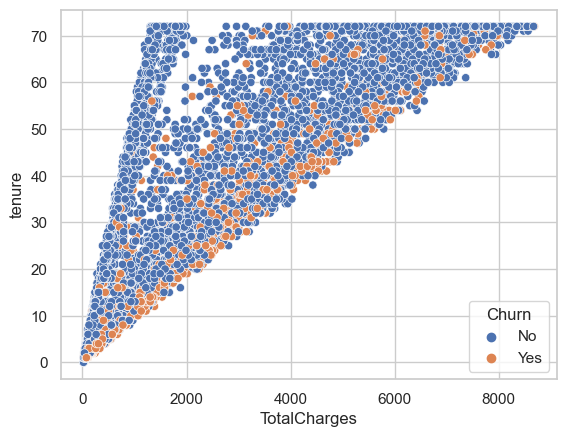

In [21]:
sns.scatterplot(data=df_churn, x='TotalCharges', y='tenure',hue ='Churn')

<AxesSubplot: xlabel='MonthlyCharges', ylabel='tenure'>

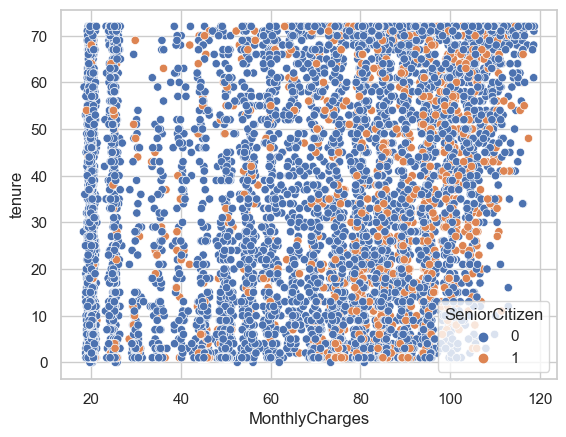

In [22]:
sns.scatterplot(data=df_churn, x='MonthlyCharges', y='tenure', hue='SeniorCitizen')

<AxesSubplot: xlabel='MonthlyCharges', ylabel='tenure'>

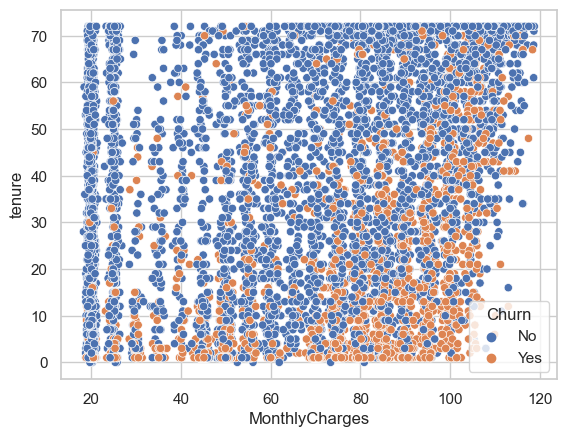

In [23]:
sns.scatterplot(data=df_churn, x='MonthlyCharges', y='tenure', hue='Churn')

In [24]:
#checking the churn with the gender identity 'Male'.
Male_gender = df_churn.loc[df_churn['gender'] == 'Male']

In [25]:
Male_gender.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    3555.000000  3555.000000     3555.000000   3555.000000
mean        0.161463    32.495359       64.327482   2279.588101
std         0.368009    24.656359       30.116093   2263.097830
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.225000    389.200000
50%         0.000000    29.000000       70.100000   1401.150000
75%         0.000000    56.000000       89.875000   3769.850000
max         1.000000    72.000000      118.350000   8684.800000

In [26]:
#checking the churn with the gender identity 'Female'.
Female_gender = df_churn.loc[df_churn['gender'] == 'Female']

In [27]:
Female_gender.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    3488.000000  3488.000000     3488.000000   3488.000000
mean        0.162844    32.244553       65.204243   2279.947018
std         0.369276    24.463233       30.061341   2270.816715
min         0.000000     0.000000       18.400000     18.850000
25%         0.000000     9.000000       35.900000    401.450000
50%         0.000000    29.000000       70.650000   1384.725000
75%         0.000000    55.000000       89.850000   3811.950000
max         1.000000    72.000000      118.750000   8672.450000

In [28]:
# Convert 'tenure' to integers since it contains objects
df_churn['tenure'] = pd.to_numeric(df_churn['tenure'], errors='coerce').astype('Int64')

# Define bins and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
order_class = ['70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74']

# Apply pd.cut after ensuring 'tenure' is numeric
df_churn['tenure Range'] = pd.cut(df_churn['tenure'], bins, labels=labels, include_lowest=True, ordered=False)


In [29]:
df_churn['tenure Range']

0         0-4
1       30-34
2         0-4
3       40-44
4         0-4
        ...  
7038    20-24
7039    70-74
7040    10-14
7041      0-4
7042    65-69
Name: tenure Range, Length: 7043, dtype: category
Categories (15, object): ['0-4', '5-9', '10-14', '15-19', ..., '55-59', '60-64', '65-69', '70-74']

In [30]:
#this will group the data by tenure and gender
reg_data = df_churn.groupby(['tenure Range', 'gender']).size().reset_index(name='Churn')

In [31]:
#This will create two differnt tables of male and female population, in order to perform an outer join later
female_table = reg_data [reg_data['gender'] == 'Female']
male_table = reg_data[reg_data['gender'] == 'Male']
female_table.columns = ['tenure Range', 'Gender', 'Female Churn']
male_table.columns = ['tenure Range', 'Gender', 'Male Churn']

In [32]:
Pyramid_table = pd.merge(female_table, male_table, on='tenure Range', how='outer')
Pyramid_table

tenure Range Gender_x  Female Churn Gender_y  Male Churn
0           0-4   Female           674     Male         697
1           5-9   Female           295     Male         304
2         10-14   Female           273     Male         227
3         15-19   Female           194     Male         214
4         20-24   Female           196     Male         215
5         25-29   Female           172     Male         180
6         30-34   Female           166     Male         185
7         35-39   Female           147     Male         147
8         40-44   Female           161     Male         151
9         45-49   Female           188     Male         152
10        50-54   Female           166     Male         184
11        55-59   Female           182     Male         166
12        60-64   Female           182     Male         192
13        65-69   Female           231     Male         270
14        70-74   Female           261     Male         271

In [33]:
pyramid_table =  Pyramid_table.drop(['Gender_x', 'Gender_y' ],axis = 1)

In [34]:
pyramid_table['Churn'] = pyramid_table['Male Churn'] + pyramid_table['Female Churn']

In [35]:
#This is required to create a similar plot for the age pyramid
pyramid_table['Male Churn'] = - (pyramid_table['Male Churn'])

In [36]:
pyramid_table

tenure Range  Female Churn  Male Churn  Churn
0           0-4           674        -697   1371
1           5-9           295        -304    599
2         10-14           273        -227    500
3         15-19           194        -214    408
4         20-24           196        -215    411
5         25-29           172        -180    352
6         30-34           166        -185    351
7         35-39           147        -147    294
8         40-44           161        -151    312
9         45-49           188        -152    340
10        50-54           166        -184    350
11        55-59           182        -166    348
12        60-64           182        -192    374
13        65-69           231        -270    501
14        70-74           261        -271    532

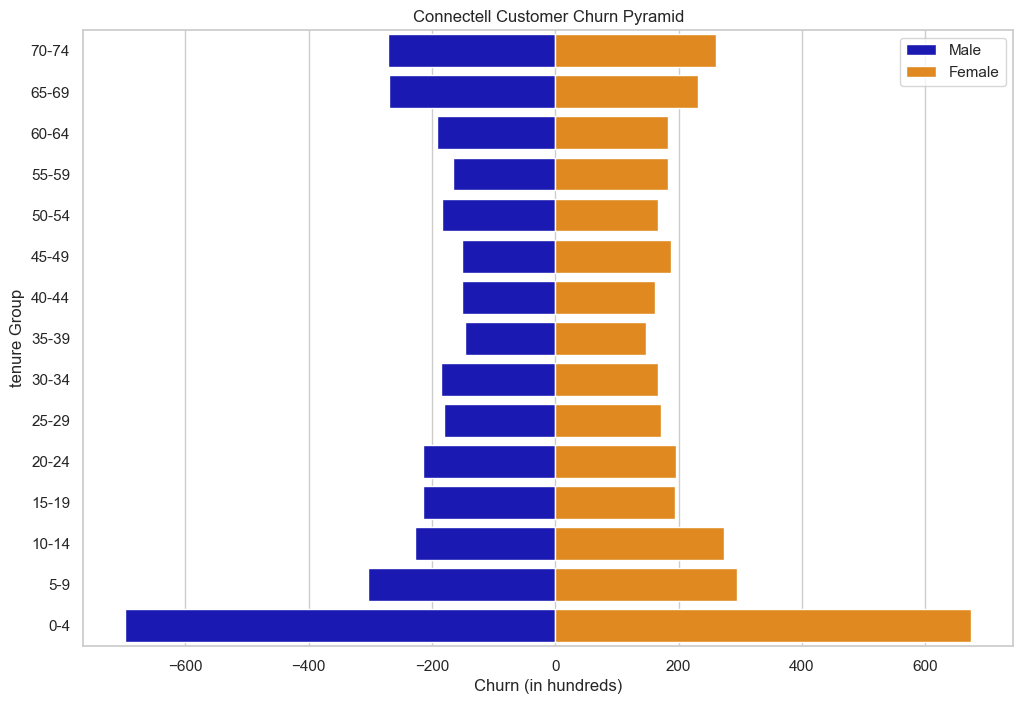

In [37]:
plt.figure(figsize=(12,8))
age_pyramid = sns.barplot(x='Male Churn', y='tenure Range', data=pyramid_table, color=('mediumblue'), label='Male', order= order_class )
age_pyramid = sns.barplot(x='Female Churn', y='tenure Range', data=pyramid_table,  color=('darkorange'), label='Female', order= order_class )
age_pyramid.set_title('Connectell Customer Churn Pyramid')
age_pyramid.set_xlabel('Churn (in hundreds)')
age_pyramid.set_ylabel('tenure Group')
age_pyramid.legend()

In [38]:
pyramid_table= pyramid_table.sort_values('tenure Range', ascending= False, ignore_index = True)
pyramid_table

tenure Range  Female Churn  Male Churn  Churn
0         70-74           261        -271    532
1         65-69           231        -270    501
2         60-64           182        -192    374
3         55-59           182        -166    348
4         50-54           166        -184    350
5         45-49           188        -152    340
6         40-44           161        -151    312
7         35-39           147        -147    294
8         30-34           166        -185    351
9         25-29           172        -180    352
10        20-24           196        -215    411
11        15-19           194        -214    408
12        10-14           273        -227    500
13          5-9           295        -304    599
14          0-4           674        -697   1371

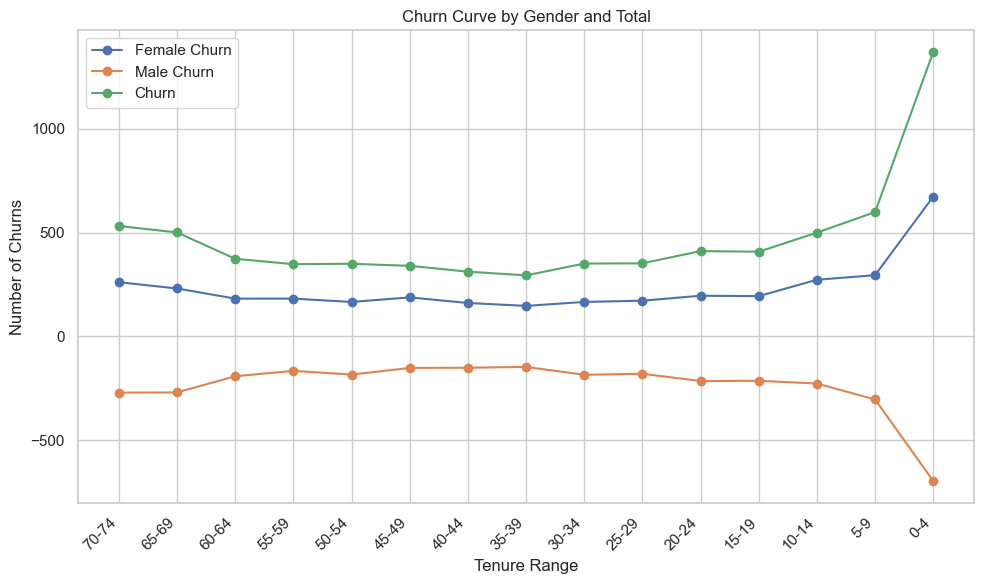

In [39]:
# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(pyramid_table['tenure Range'], pyramid_table['Female Churn'], label='Female Churn', marker='o')
plt.plot(pyramid_table['tenure Range'], pyramid_table['Male Churn'], label='Male Churn', marker='o')
plt.plot(pyramid_table['tenure Range'], pyramid_table['Churn'], label='Churn', marker='o')

# Add labels and title
plt.xlabel('Tenure Range')
plt.ylabel('Number of Churns')
plt.title('Churn Curve by Gender and Total')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### CHURN RATES

In [40]:
# Calculate churn rate for Female and Male
pyramid_table['Female Churn Rate'] = (pyramid_table['Female Churn'] / pyramid_table['Churn']).abs() * 100
pyramid_table['Male Churn Rate'] = (pyramid_table['Male Churn'] / pyramid_table['Churn']).abs() * 100

# Display the DataFrame with churn rates
pyramid_table[['tenure Range', 'Female Churn Rate', 'Male Churn Rate']]


tenure Range  Female Churn Rate  Male Churn Rate
0         70-74          49.060150        50.939850
1         65-69          46.107784        53.892216
2         60-64          48.663102        51.336898
3         55-59          52.298851        47.701149
4         50-54          47.428571        52.571429
5         45-49          55.294118        44.705882
6         40-44          51.602564        48.397436
7         35-39          50.000000        50.000000
8         30-34          47.293447        52.706553
9         25-29          48.863636        51.136364
10        20-24          47.688564        52.311436
11        15-19          47.549020        52.450980
12        10-14          54.600000        45.400000
13          5-9          49.248748        50.751252
14          0-4          49.161196        50.838804

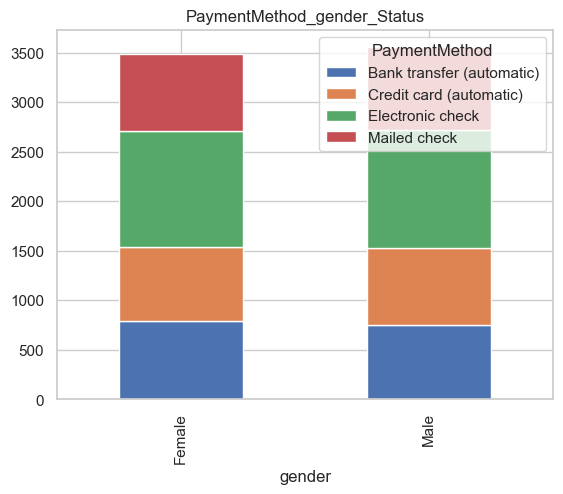

In [41]:
df_churn.groupby(['gender','PaymentMethod'])['TotalCharges'].size().unstack().plot(kind='bar',stacked=True, title = "PaymentMethod_gender_Status")
plt.show()

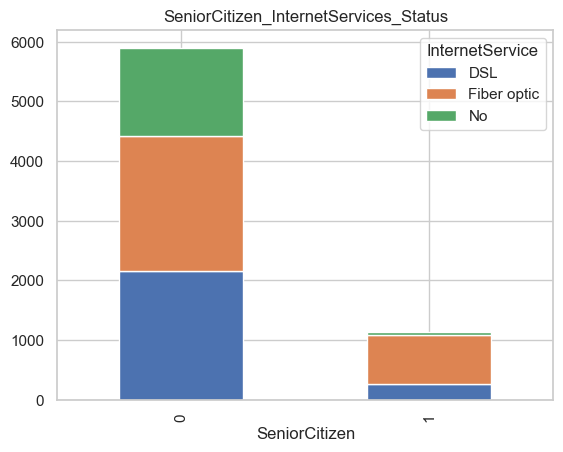

In [42]:
df_churn.groupby(['SeniorCitizen','InternetService'])['TotalCharges'].size().unstack().plot(kind='bar',stacked=True, title = "SeniorCitizen_InternetServices_Status")
plt.show()

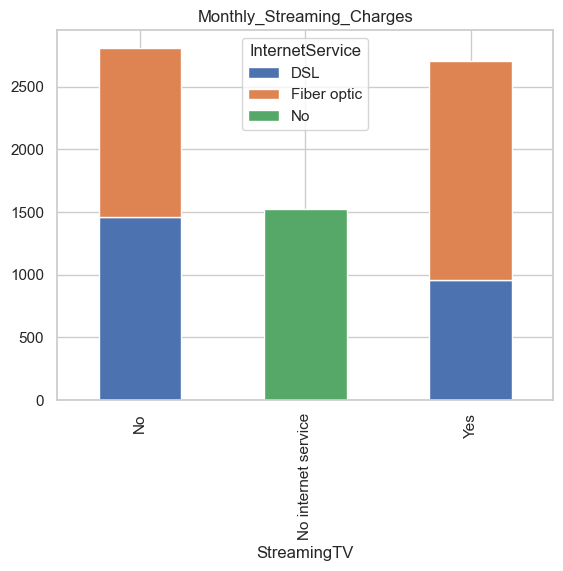

In [43]:
df_churn.groupby(['StreamingTV','InternetService'])['MonthlyCharges'].size().unstack().plot(kind='bar',stacked=True, title = "Monthly_Streaming_Charges")
plt.show()

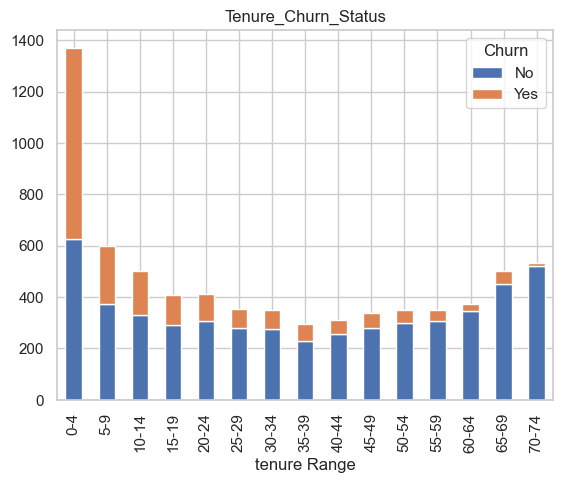

In [44]:
df_churn.groupby(['tenure Range','Churn'])['TotalCharges'].size().unstack().plot(kind='bar',stacked=True, title = "Tenure_Churn_Status")
plt.show()

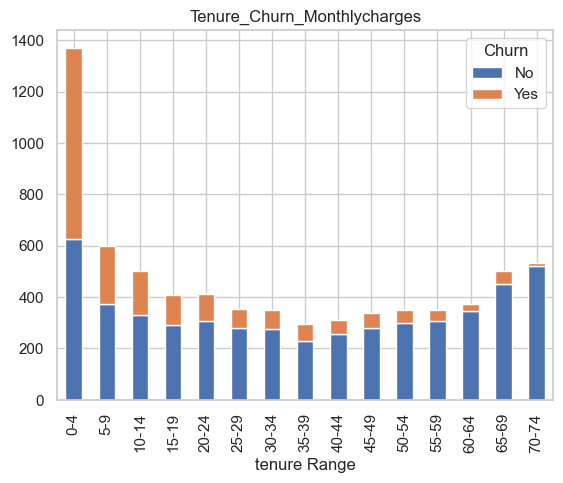

In [45]:
df_churn.groupby(['tenure Range','Churn'])['MonthlyCharges'].size().unstack().plot(kind='bar',stacked=True, title = "Tenure_Churn_Monthlycharges")
plt.show()

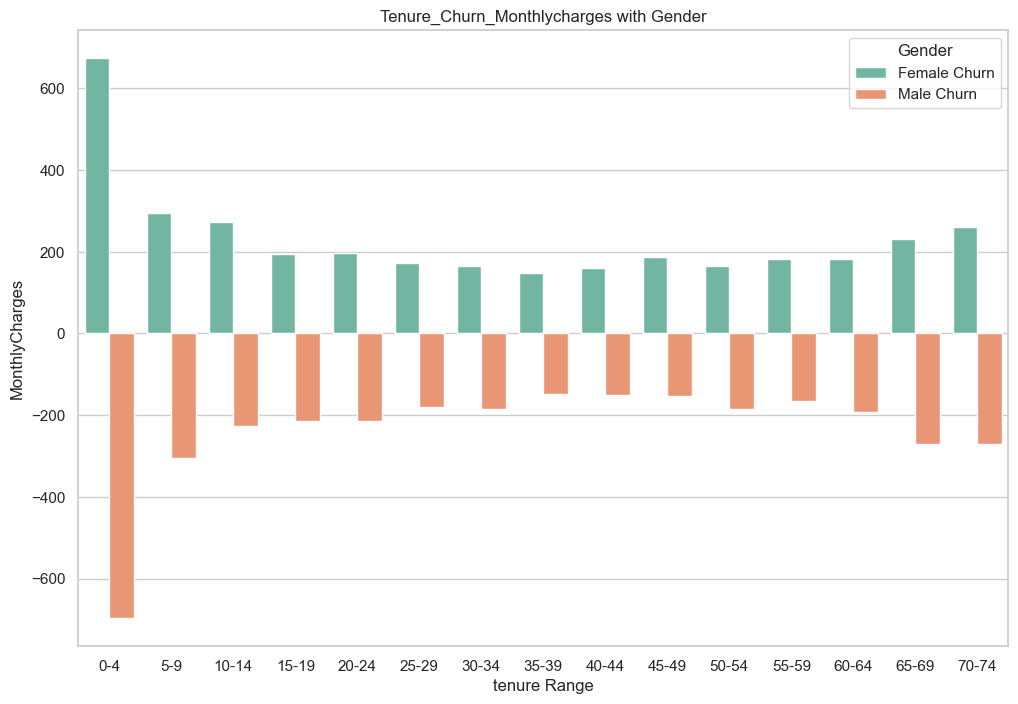

In [46]:
# Melt the DataFrame to make it suitable for Seaborn's barplot
df_melted = pd.melt(pyramid_table, id_vars=['tenure Range', 'Churn'], value_vars=['Female Churn', 'Male Churn'], var_name='Gender', value_name='MonthlyCharges')

# Plot using Seaborn's barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='tenure Range', y='MonthlyCharges', hue='Gender', data=df_melted, palette='Set2', ci=None)
plt.title("Tenure_Churn_Monthlycharges with Gender")
plt.show()

<AxesSubplot: xlabel='tenure Range', ylabel='TotalCharges'>

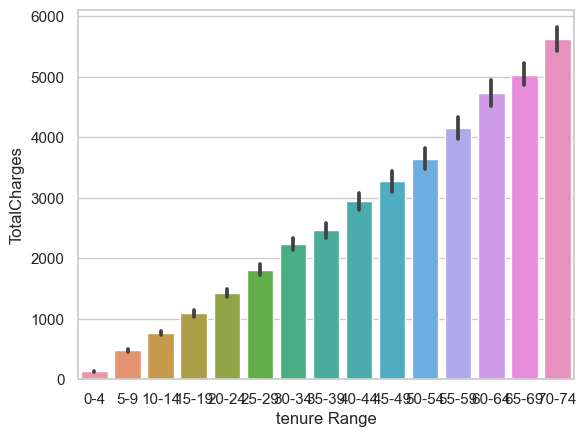

In [47]:
sns.barplot(df_churn, x = 'tenure Range', y = 'TotalCharges')

Text(0, 0.5, 'Tenure_DeviceProtection')

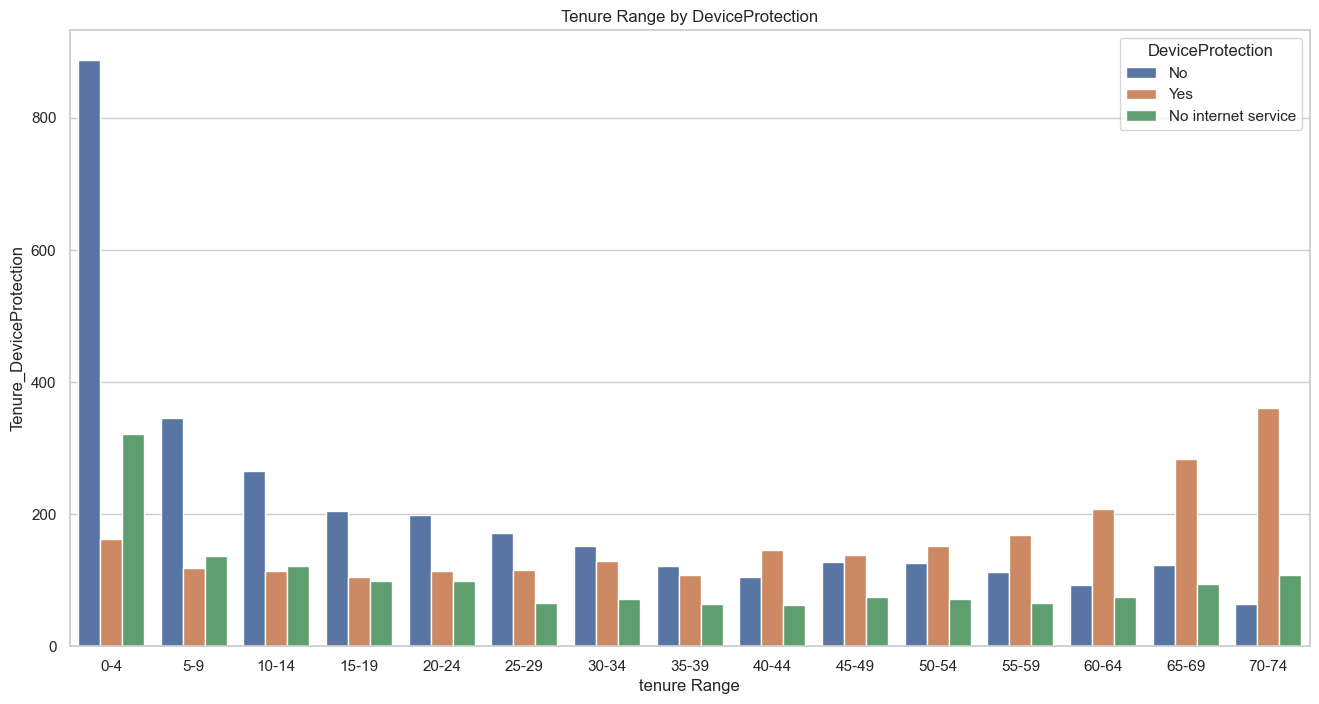

In [48]:
plt.figure(figsize= (16,8))

Religion_plot = sns.countplot(data = df_churn, x = 'tenure Range', hue = 'DeviceProtection'  )
Religion_plot.set_title('Tenure Range by DeviceProtection')
Religion_plot.set_ylabel('Tenure_DeviceProtection')

Text(0, 0.5, 'Tenure_Churn')

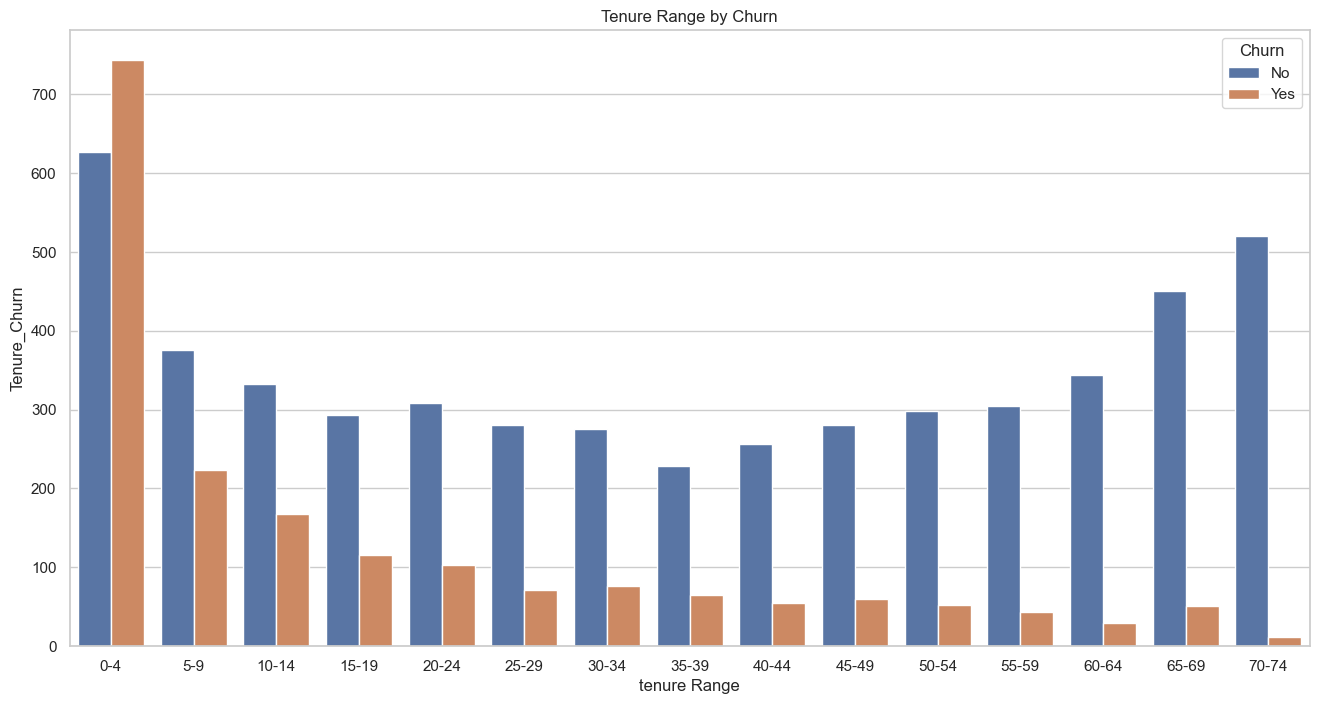

In [49]:
plt.figure(figsize= (16,8))

Religion_plot = sns.countplot(data = df_churn, x = 'tenure Range', hue = 'Churn'  )
Religion_plot.set_title('Tenure Range by Churn')
Religion_plot.set_ylabel('Tenure_Churn')

Text(0, 0.5, 'Tenure_Churn')

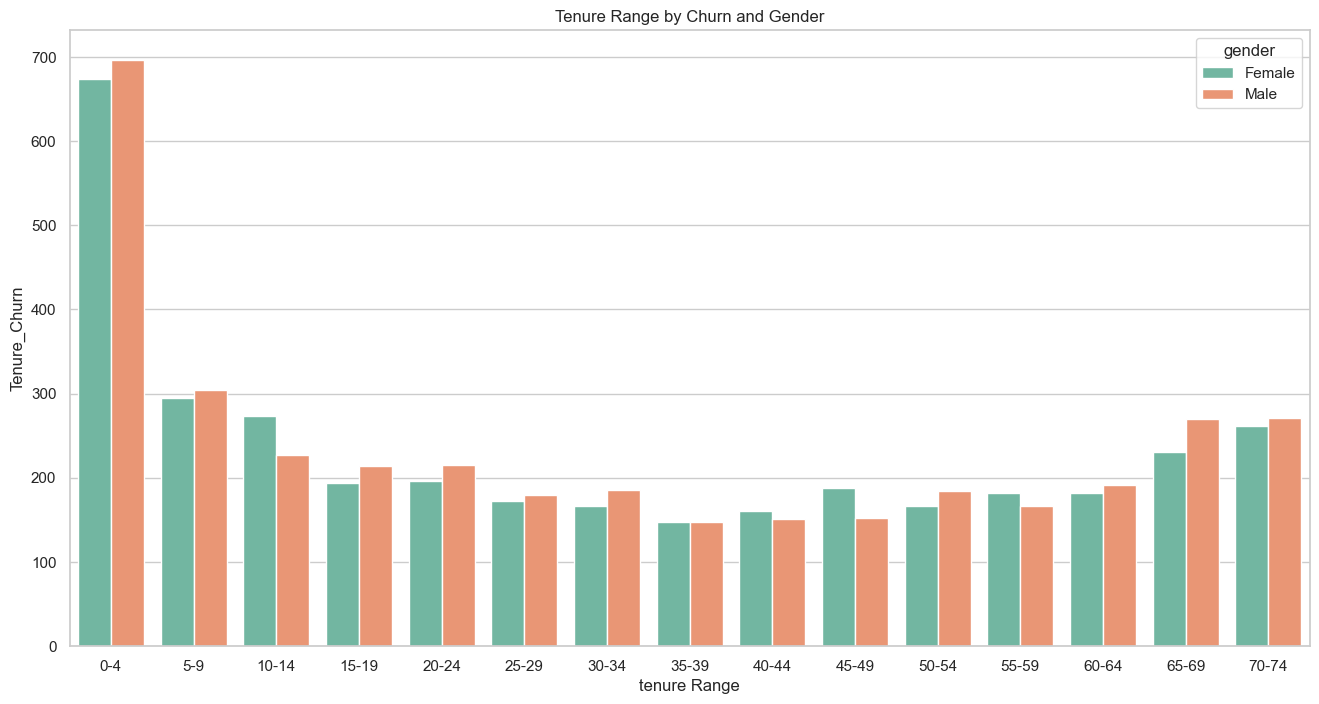

In [50]:
plt.figure(figsize=(16, 8))

Religion_plot = sns.countplot(data=df_churn, x='tenure Range', hue='gender', palette='Set2')
Religion_plot.set_title('Tenure Range by Churn and Gender')
Religion_plot.set_ylabel('Tenure_Churn')

In [51]:
df_churn['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

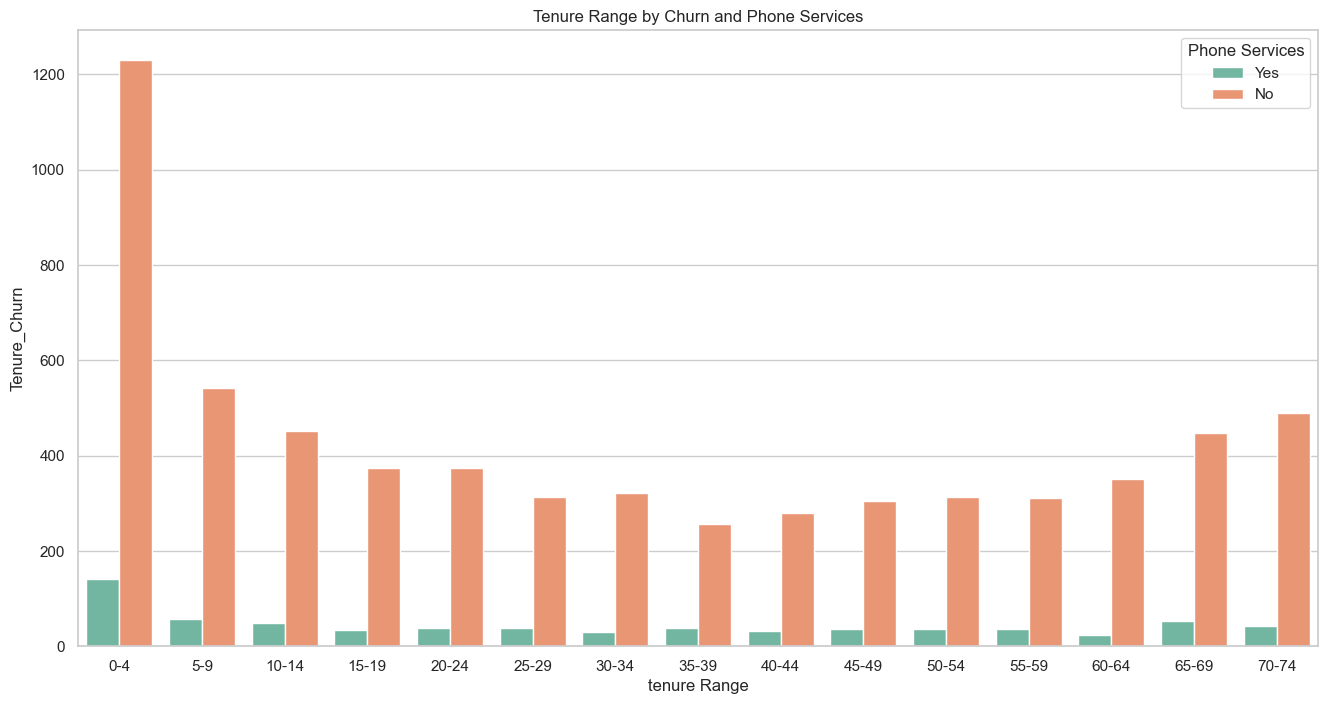

In [52]:
# Create a second plot for 'phone services'
plt.figure(figsize=(16, 8))
Services_plot = sns.countplot(data=df_churn, x='tenure Range', hue='PhoneService', palette='Set2')
Services_plot.set_title('Tenure Range by Churn and Phone Services')
Services_plot.set_ylabel('Tenure_Churn')

# Add a legend for phone services
plt.legend(title='Phone Services', loc='upper right', labels=['Yes', 'No'])

plt.show()

<Figure size 1200x800 with 0 Axes>

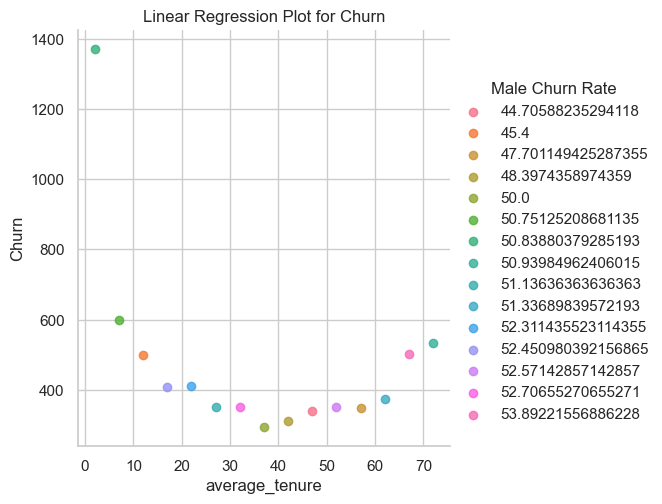

In [53]:
# Assuming 'tenure Range' is a column in pyramid_table
# Split 'tenure Range' into two columns
pyramid_table[['start', 'end']] = pyramid_table['tenure Range'].str.split('-', expand=True)

# Convert 'start' and 'end' to numeric
pyramid_table[['start', 'end']] = pyramid_table[['start', 'end']].apply(pd.to_numeric, errors='coerce')

# Calculate the average and create a new column 'average_tenure'
pyramid_table['average_tenure'] = (pyramid_table['start'] + pyramid_table['end']) / 2

# Plot the lmplot
plt.figure(figsize=(12, 8))
sns.lmplot(data=pyramid_table, x='average_tenure', y='Churn', hue='Male Churn Rate')
plt.title('Linear Regression Plot for Churn')
plt.show()

<Figure size 1200x800 with 0 Axes>

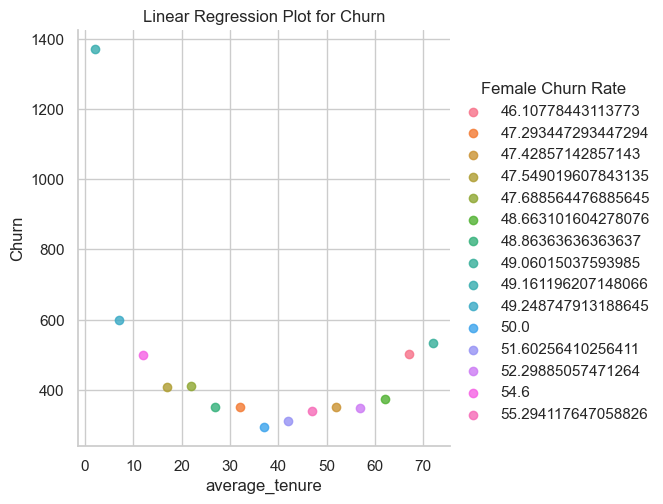

In [54]:
# Assuming 'tenure Range' is a column in pyramid_table
# Split 'tenure Range' into two columns
pyramid_table[['start', 'end']] = pyramid_table['tenure Range'].str.split('-', expand=True)

# Convert 'start' and 'end' to numeric
pyramid_table[['start', 'end']] = pyramid_table[['start', 'end']].apply(pd.to_numeric, errors='coerce')

# Calculate the average and create a new column 'average_tenure'
pyramid_table['average_tenure'] = (pyramid_table['start'] + pyramid_table['end']) / 2

# Plot the lmplot
plt.figure(figsize=(12, 8))
sns.lmplot(data=pyramid_table, x='average_tenure', y='Churn', hue='Female Churn Rate')
plt.title('Linear Regression Plot for Churn')
plt.show()

#### FURTHER ANALYSING THE CHURN BOTH YES AND NO

In [55]:
#Considering when the Churn is Yes
churn_yes = df_churn[df_churn['Churn'] == 'Yes']
churn_yes

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
8     7892-POOKP  Female              0     Yes         No      28   
13    0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7021  1699-HPSBG    Male              0      No         No      12   
7026  8775-CEBBJ  Female              0      No         No       9   
7032  6894-LFHLY    Male              1      No         No       1   
7034  0639-TSIQW  Female              0      No         No      67   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
2             Yes            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
5             Yes           Yes     Fiber optic             No  ...   
8             Yes           Yes     Fiber optic             No  ...   
13            Yes           Yes     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7021          Yes            No             DSL             No  ...   
7026          Yes            No             DSL             No  ...   
7032          Yes           Yes     Fiber optic             No  ...   
7034          Yes           Yes     Fiber optic            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
2             No          No              No  Month-to-month              Yes   
4             No          No              No  Month-to-month              Yes   
5             No         Yes             Yes  Month-to-month              Yes   
8            Yes         Yes             Yes  Month-to-month              Yes   
13            No         Yes             Yes  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7021         Yes         Yes              No        One year              Yes   
7026          No          No              No  Month-to-month              Yes   
7032          No          No              No  Month-to-month              Yes   
7034          No         Yes              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
2                  Mailed check          53.85       108.15    Yes   
4              Electronic check          70.70       151.65    Yes   
5              Electronic check          99.65       820.50    Yes   
8              Electronic check         104.80      3046.05    Yes   
13    Bank transfer (automatic)         103.70      5036.30    Yes   
...                         ...            ...          ...    ...   
7021           Electronic check          59.80       727.80    Yes   
7026  Bank transfer (automatic)          44.20       403.35    Yes   
7032           Electronic check          75.75        75.75    Yes   
7034    Credit card (automatic)         102.95      6886.25    Yes   
7041               Mailed check          74.40       306.60    Yes   

      tenure Range  
2              0-4  
4              0-4  
5              5-9  
8            25-29  
13           45-49  
...            ...  
7021         10-14  
7026           5-9  
7032           0-4  
7034         65-69  
7041           0-4  

[1869 rows x 22 columns]

Text(0.5, 1.0, 'Yes Churn Count by Partner')

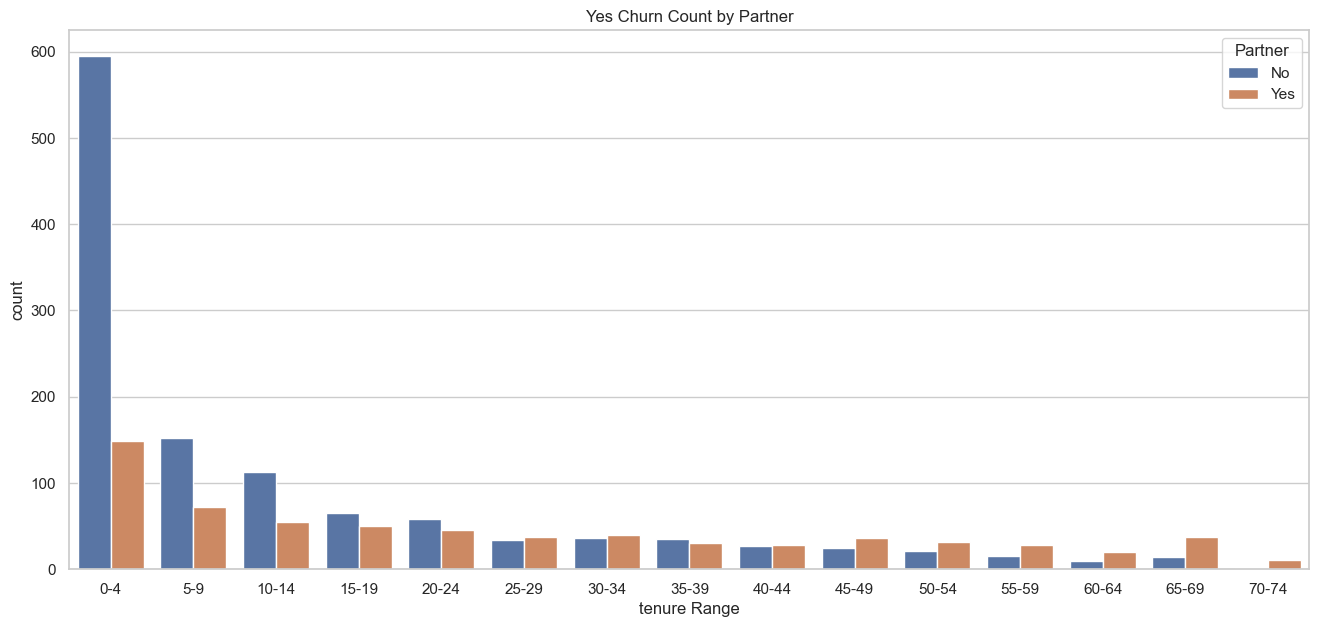

In [56]:
plt.figure(figsize= (16,7))
churn_yes_plot = sns.countplot(data = churn_yes, x = 'tenure Range', hue = 'Partner' )
churn_yes_plot.set_title  ('Yes Churn Count by Partner')

Text(0.5, 1.0, 'Yes Churn Count by Dependents')

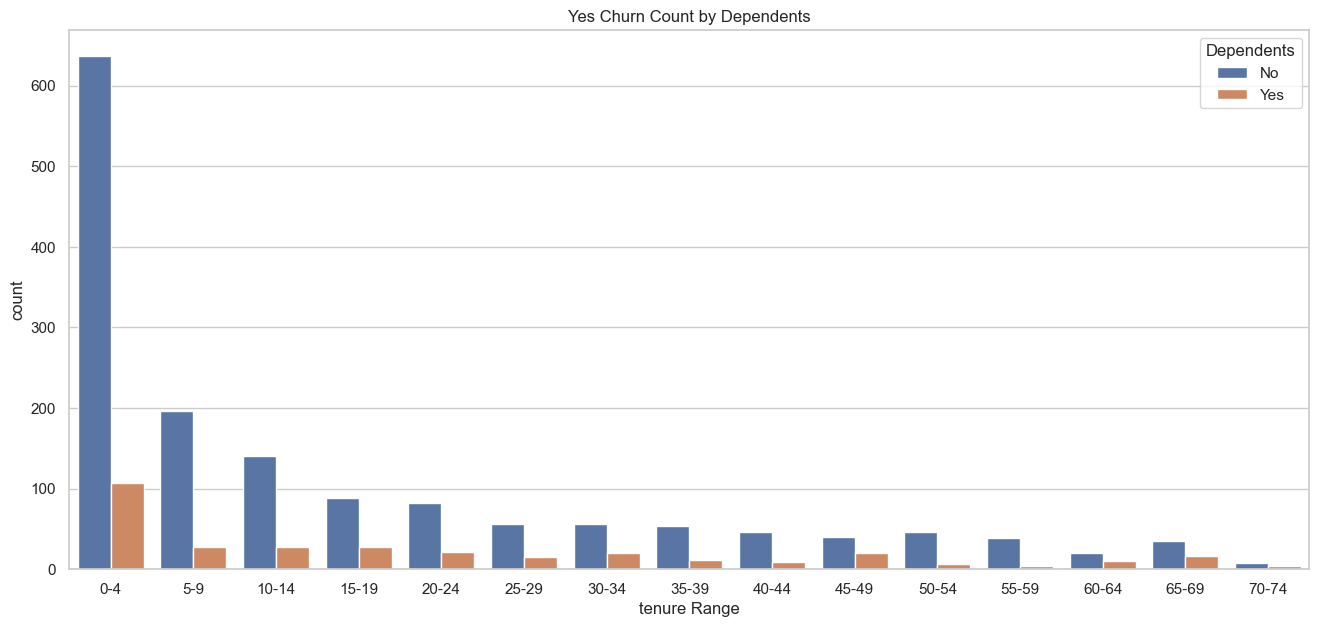

In [57]:
plt.figure(figsize= (16,7))
churn_yes_dependents_plot = sns.countplot(data = churn_yes, x = 'tenure Range', hue = 'Dependents' )
churn_yes_dependents_plot.set_title  ('Yes Churn Count by Dependents')

Text(0.5, 1.0, 'Yes Churn Count by MultipleLines')

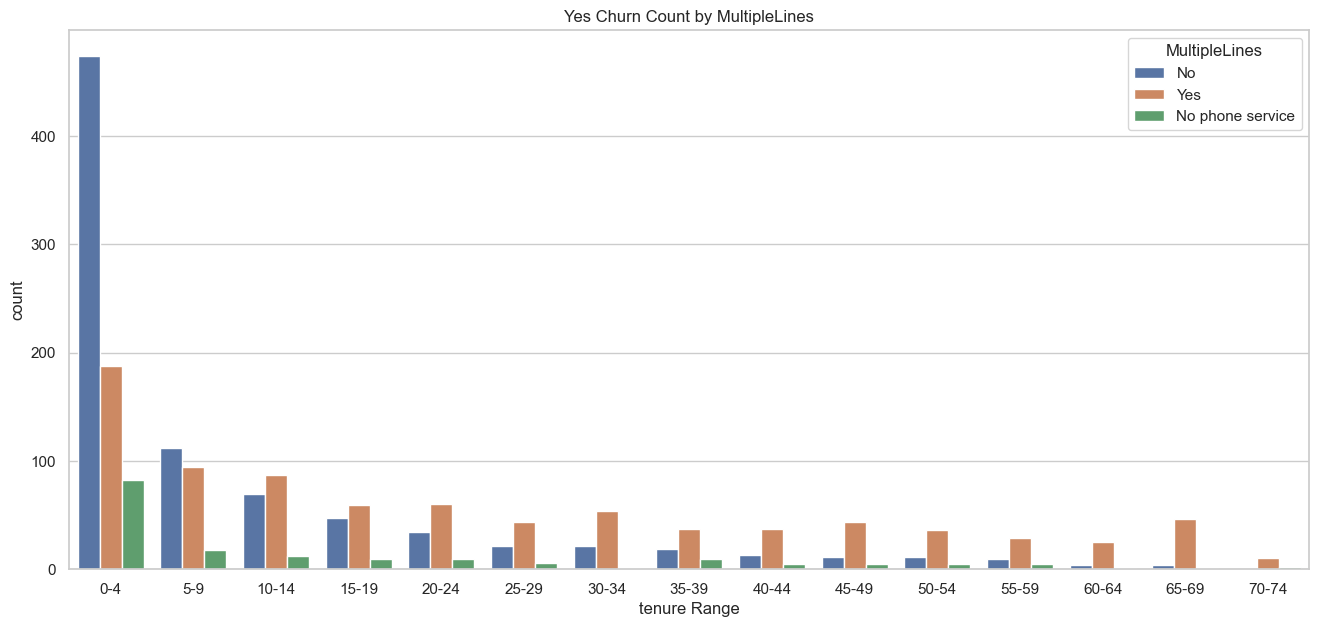

In [58]:
plt.figure(figsize= (16,7))
churn_yes_multipleLine_plot = sns.countplot(data = churn_yes, x = 'tenure Range', hue = 'MultipleLines' )
churn_yes_multipleLine_plot.set_title('Yes Churn Count by MultipleLines')

<Figure size 1000x600 with 0 Axes>

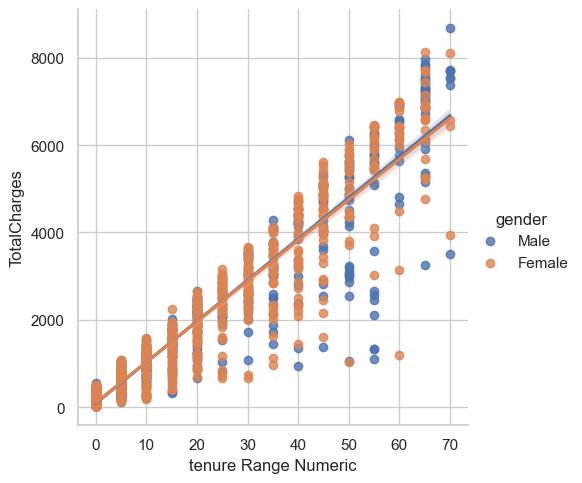

In [59]:
# Map 'tenure Range' to numerical values
churn_yes['tenure Range Numeric'] = churn_yes['tenure Range'].str.extract('(\d+)').astype(float)

# Plot lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(data=churn_yes, x='tenure Range Numeric', y='TotalCharges', hue='gender')
plt.show()

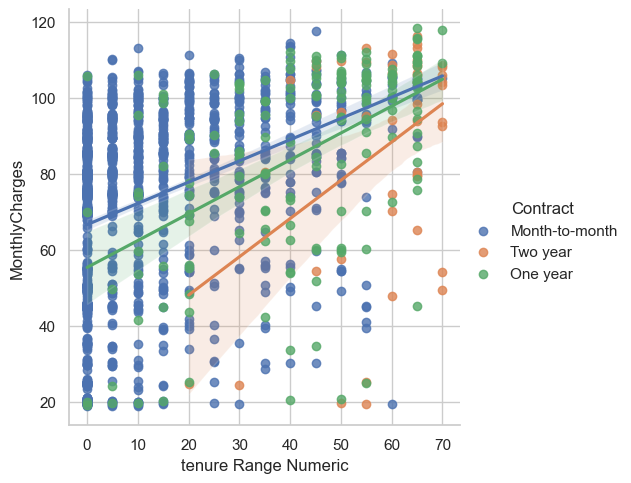

In [60]:
sns.lmplot(data=churn_yes, x='tenure Range Numeric', y='MonthlyCharges', hue='Contract')

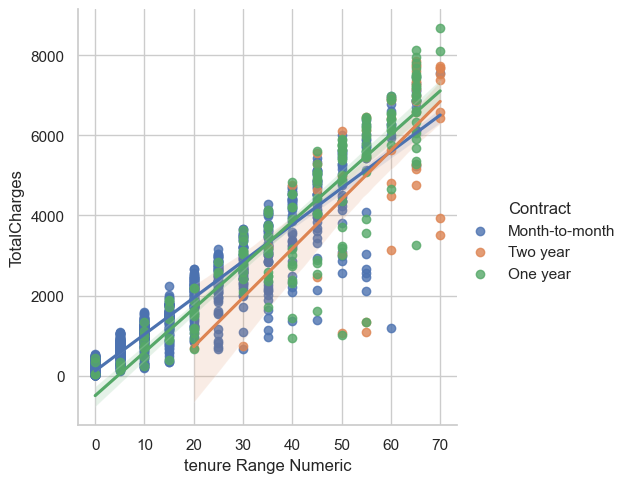

In [61]:
sns.lmplot(data=churn_yes, x='tenure Range Numeric', y='TotalCharges', hue='Contract')

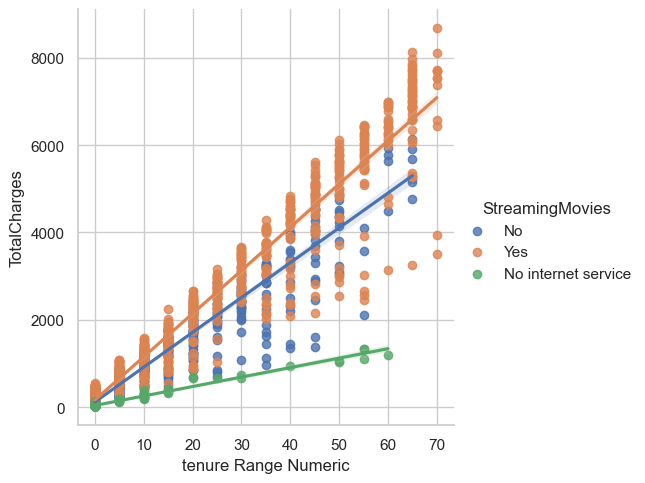

In [62]:
sns.lmplot(data=churn_yes, x='tenure Range Numeric', y='TotalCharges', hue='StreamingMovies')

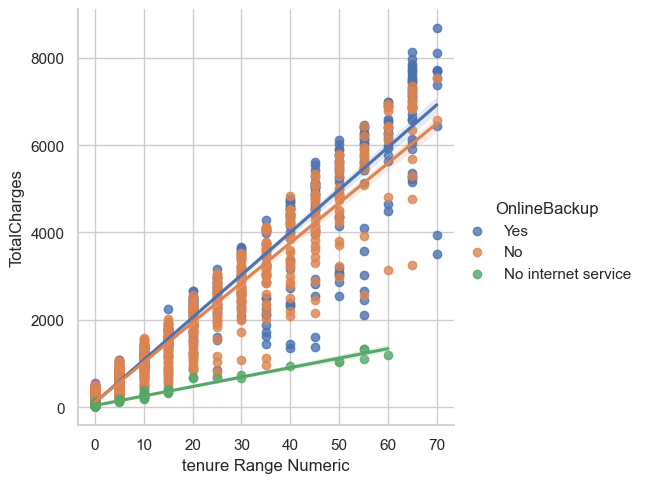

In [63]:
sns.lmplot(data=churn_yes, x='tenure Range Numeric', y='TotalCharges', hue='OnlineBackup')

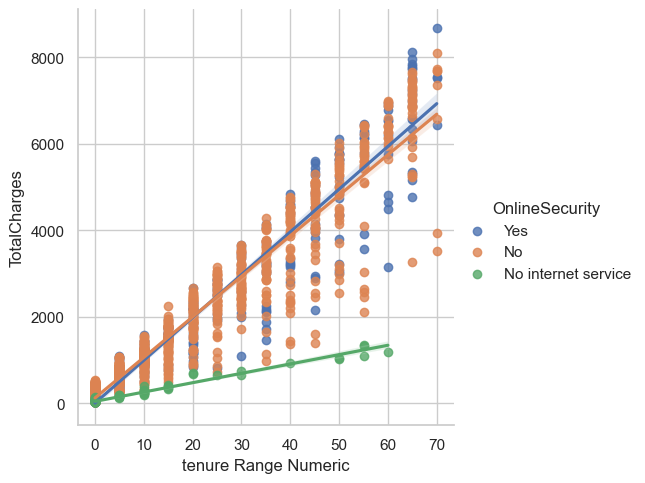

In [64]:
sns.lmplot(data=churn_yes, x='tenure Range Numeric', y='TotalCharges', hue='OnlineSecurity')

In [65]:
#Considering when the Churn is No
churn_no = df_churn[df_churn['Churn'] == 'No']
churn_no

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
3     7795-CFOCW    Male              0      No         No      45   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
...          ...     ...            ...     ...        ...     ...   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service             DSL                   No  ...   
1             Yes                No             DSL                  Yes  ...   
3              No  No phone service             DSL                  Yes  ...   
6             Yes               Yes     Fiber optic                   No  ...   
7              No  No phone service             DSL                  Yes  ...   
...           ...               ...             ...                  ...  ...   
7037          Yes                No              No  No internet service  ...   
7038          Yes               Yes             DSL                  Yes  ...   
7039          Yes               Yes     Fiber optic                   No  ...   
7040           No  No phone service             DSL                  Yes  ...   
7042          Yes                No     Fiber optic                  Yes  ...   

              TechSupport          StreamingTV      StreamingMovies  \
0                      No                   No                   No   
1                      No                   No                   No   
3                     Yes                   No                   No   
6                      No                  Yes                   No   
7                      No                   No                   No   
...                   ...                  ...                  ...   
7037  No internet service  No internet service  No internet service   
7038                  Yes                  Yes                  Yes   
7039                   No                  Yes                  Yes   
7040                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
3           One year               No  Bank transfer (automatic)   
6     Month-to-month              Yes    Credit card (automatic)   
7     Month-to-month               No               Mailed check   
...              ...              ...                        ...   
7037        Two year              Yes  Bank transfer (automatic)   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7042        Two year              Yes  Bank transfer (automatic)   

     MonthlyCharges TotalCharges  Churn  tenure Range  
0             29.85        29.85     No           0-4  
1             56.95      1889.50     No         30-34  
3             42.30      1840.75     No         40-44  
6             89.10      1949.40     No         20-24  
7             29.75       301.90     No           5-9  
...             ...          ...    ...           ...  
7037          21.15      1419.40     No         70-74  
7038          84.80      1990.50     No         20-24  
7039         103.2

Text(0.5, 1.0, 'No Churn Count by Partner')

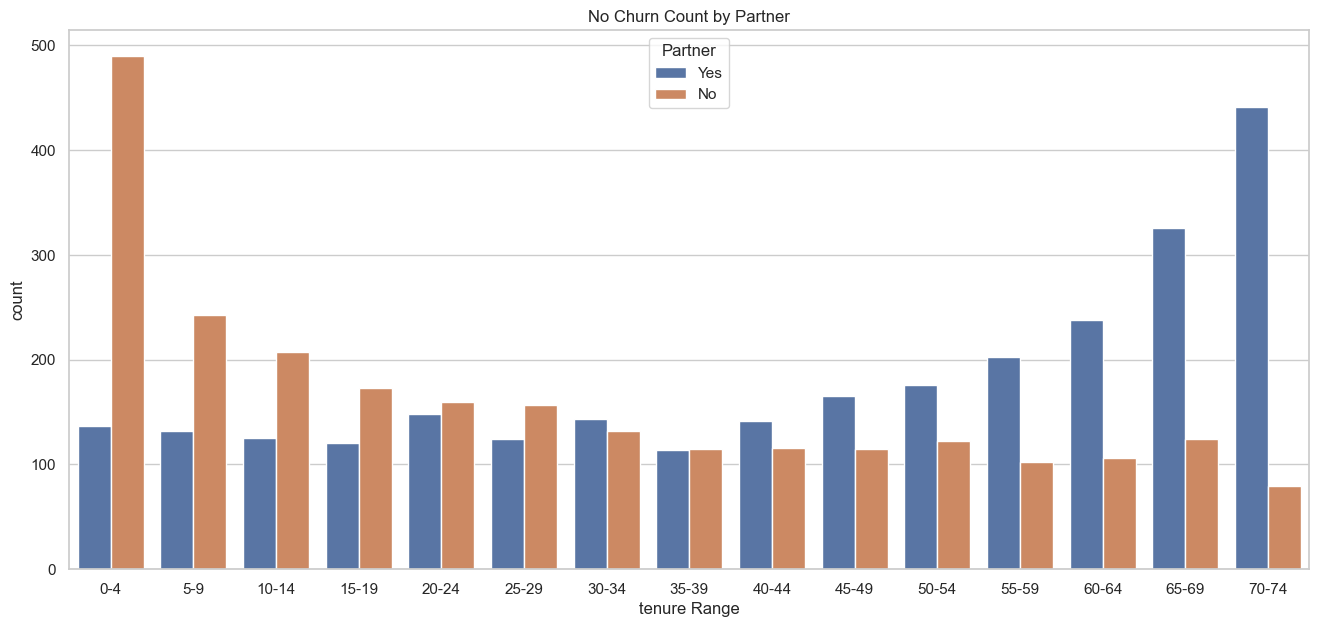

In [66]:
plt.figure(figsize= (16,7))
churn_no_plot = sns.countplot(data = churn_no, x = 'tenure Range', hue = 'Partner' )
churn_no_plot.set_title  ('No Churn Count by Partner')

Text(0.5, 1.0, 'No Churn Count by Dependents')

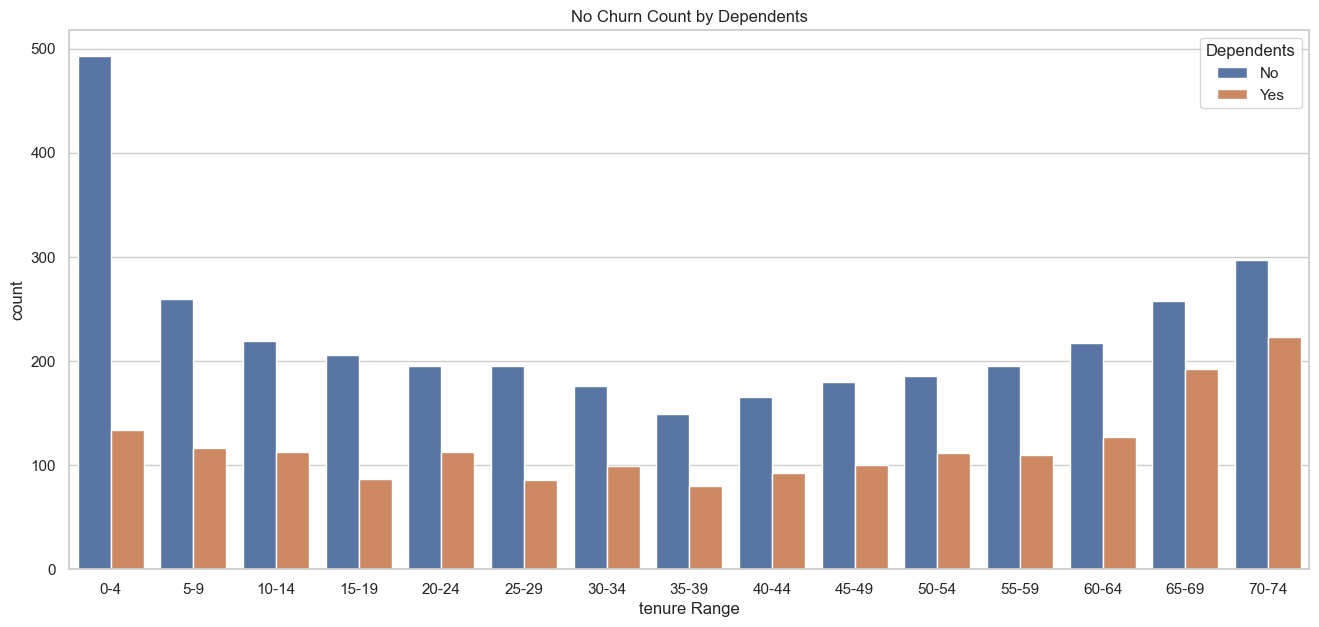

In [67]:
plt.figure(figsize= (16,7))
churn_no_dependents_plot = sns.countplot(data = churn_no, x = 'tenure Range', hue = 'Dependents' )
churn_no_dependents_plot.set_title  ('No Churn Count by Dependents')

Text(0.5, 1.0, 'No Churn Count by MultipleLines')

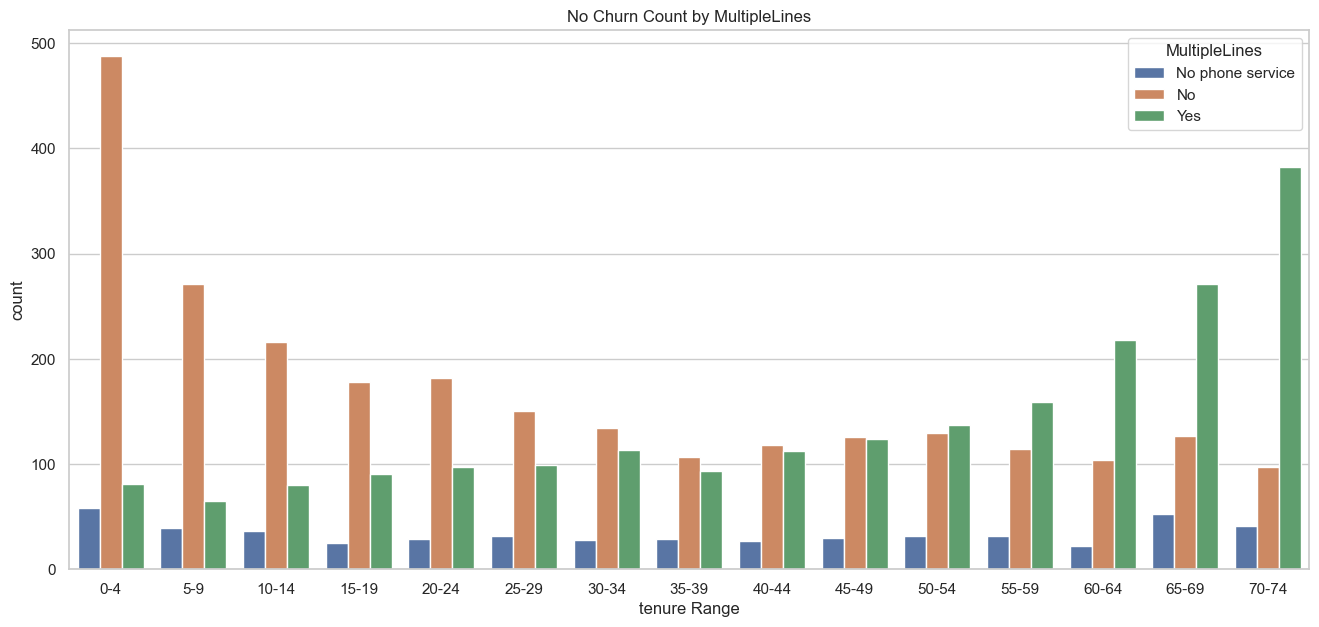

In [68]:
plt.figure(figsize= (16,7))
churn_no_multipleLine_plot = sns.countplot(data = churn_no, x = 'tenure Range', hue = 'MultipleLines' )
churn_no_multipleLine_plot.set_title('No Churn Count by MultipleLines')

<Figure size 1000x600 with 0 Axes>

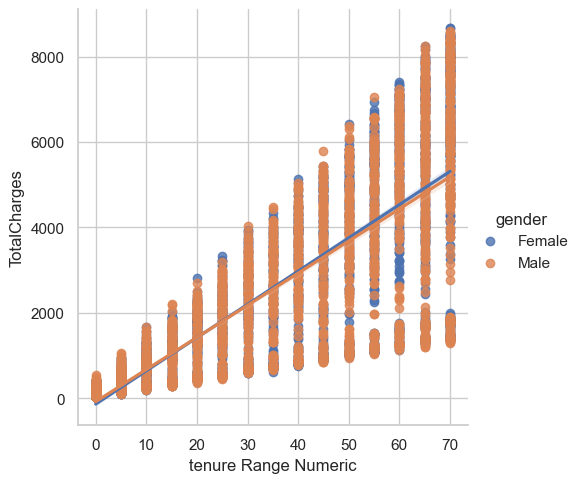

In [69]:
# Map 'tenure Range' to numerical values
churn_no['tenure Range Numeric'] = churn_no['tenure Range'].str.extract('(\d+)').astype(float)

# Plot lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(data=churn_no, x='tenure Range Numeric', y='TotalCharges', hue='gender')
plt.show()

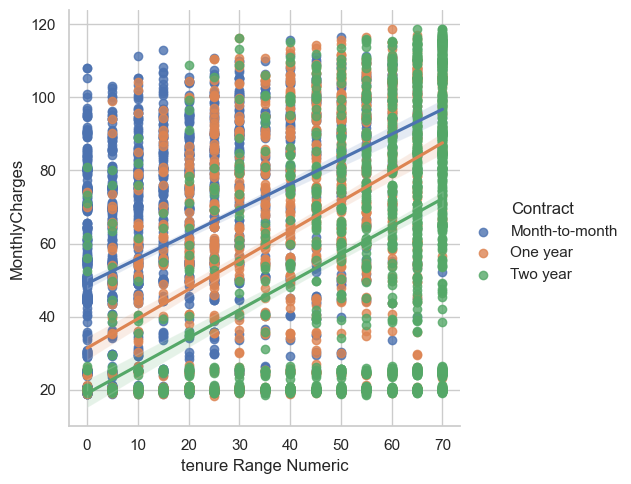

In [70]:
sns.lmplot(data=churn_no, x='tenure Range Numeric', y='MonthlyCharges', hue='Contract')

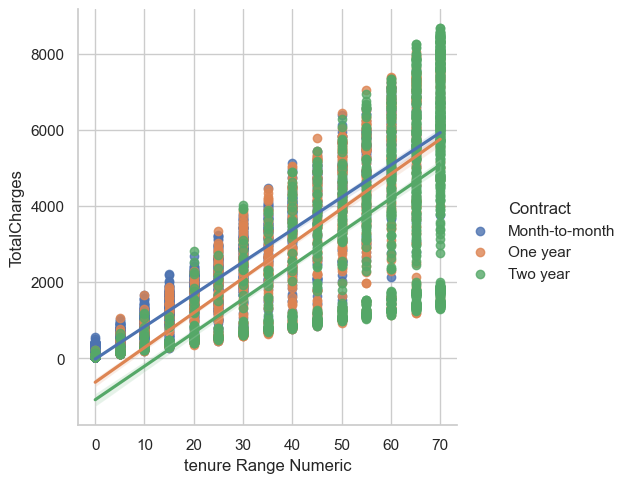

In [71]:
sns.lmplot(data=churn_no, x='tenure Range Numeric', y='TotalCharges', hue='Contract')

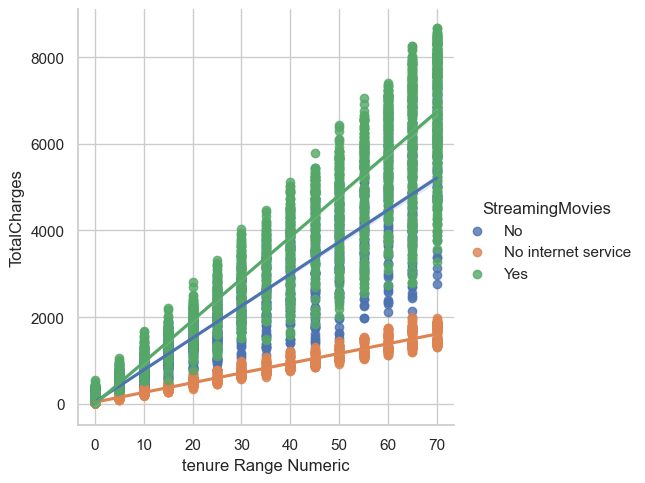

In [72]:
sns.lmplot(data=churn_no, x='tenure Range Numeric', y='TotalCharges', hue='StreamingMovies')

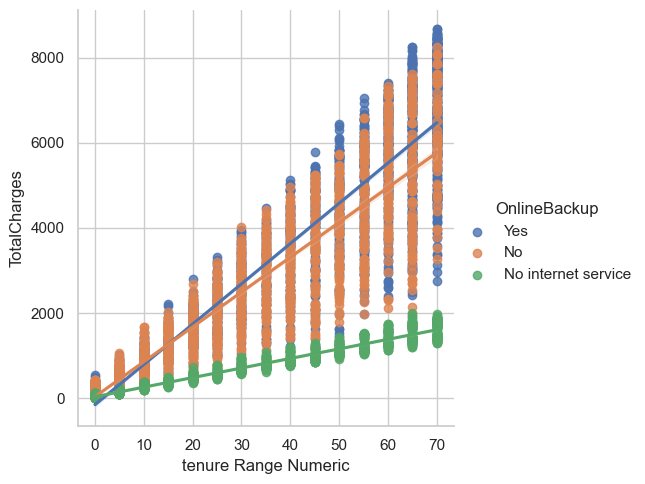

In [73]:
sns.lmplot(data=churn_no, x='tenure Range Numeric', y='TotalCharges', hue='OnlineBackup')

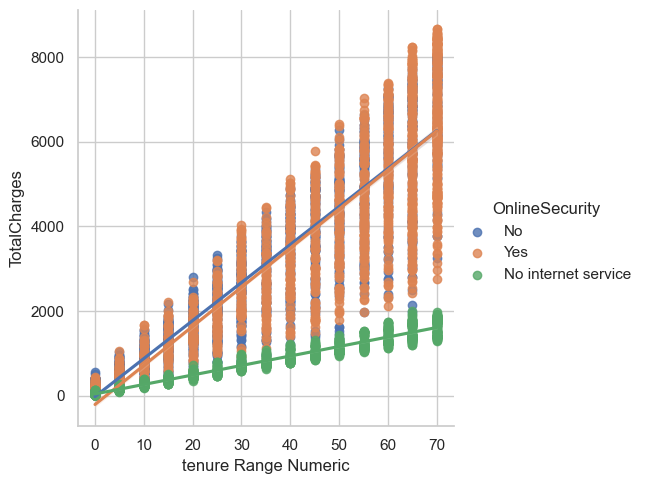

In [74]:
sns.lmplot(data=churn_no, x='tenure Range Numeric', y='TotalCharges', hue='OnlineSecurity')

### TASK 3. PERFORMING PRINCIPAL COMPONENT ANALYSIS ON THE DATAFRAME
When dealing with a large number of features, PCA can help in reducing the dimensionality of the dataset. This is particularly useful when there are correlated features. This can be useful for visual exploration of patterns and potential clusters related to churn.

In [75]:
#encode churn column into numeral values using LabelEncoder
le = LabelEncoder()

Churn_class = le.fit_transform(df_churn['Churn'])
df_churn['Churn'] = Churn_class
Churn_class

array([0, 0, 1, ..., 0, 1, 0])

In [76]:
# Assuming 'churn' is the original DataFrame
cols = ['SeniorCitizen', 'tenure Range', 'MonthlyCharges', 'TotalCharges', 'Churn']

X_data = df_churn[cols].copy() # Use .copy() to create a new DataFrame and avoid modifying the original DataFrame

# Display the new DataFrame
X_data.head()


SeniorCitizen tenure Range  MonthlyCharges  TotalCharges  Churn
0              0          0-4           29.85         29.85      0
1              0        30-34           56.95       1889.50      0
2              0          0-4           53.85        108.15      1
3              0        40-44           42.30       1840.75      0
4              0          0-4           70.70        151.65      1

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify numeric and categorical features
numeric_features = X_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_data.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [78]:
# Apply the preprocessing steps
X_preprocessed = preprocessor.fit_transform(X_data)

In [79]:
scaler = StandardScaler()

pca_churn_std = scaler.fit_transform(X_preprocessed)

pca_churn_std_df = pd.DataFrame(pca_churn_std)
pca_churn_std_df

0         1         2
0    -0.439916 -1.160323 -0.992638
1    -0.439916 -0.259629 -0.172181
2    -0.439916 -0.362660 -0.958093
3    -0.439916 -0.746535 -0.193689
4    -0.439916  0.197365 -0.938901
...        ...       ...       ...
7038 -0.439916  0.665992 -0.127621
7039 -0.439916  1.277533  2.242623
7040 -0.439916 -1.168632 -0.852958
7041  2.273159  0.320338 -0.870539
7042 -0.439916  1.358961  2.013911

[7043 rows x 3 columns]

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

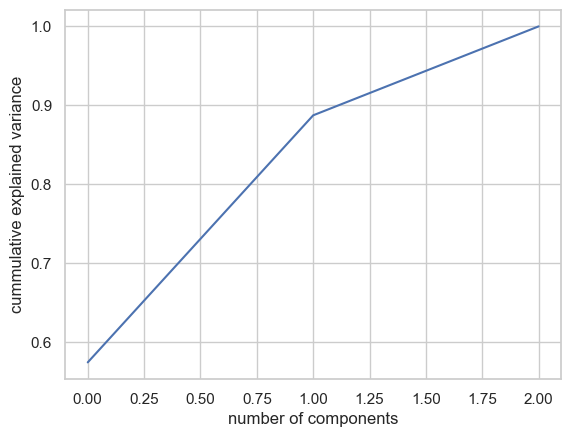

In [81]:
pca=PCA().fit(pca_churn_std_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
plt.show()

In [82]:
pca=PCA(n_components=2)
new_data= pca.fit_transform(pca_churn_std_df)
new_df = pd.DataFrame(new_data, columns=['PC1','PC2'])
new_df

PC1       PC2
0    -1.586004  0.029721
1    -0.425323 -0.331022
2    -1.015445 -0.076768
3    -0.773880 -0.265889
4    -0.618210 -0.149975
...        ...       ...
7038  0.239720 -0.455971
7039  2.226034 -1.258927
7040 -1.499401 -0.012268
7041  0.333238  2.374929
7042  2.130802 -1.198324

[7043 rows x 2 columns]

In [83]:
new_df['Churn'] = X_data['Churn']
new_df

PC1       PC2  Churn
0    -1.586004  0.029721      0
1    -0.425323 -0.331022      0
2    -1.015445 -0.076768      1
3    -0.773880 -0.265889      0
4    -0.618210 -0.149975      1
...        ...       ...    ...
7038  0.239720 -0.455971      0
7039  2.226034 -1.258927      0
7040 -1.499401 -0.012268      0
7041  0.333238  2.374929      1
7042  2.130802 -1.198324      0

[7043 rows x 3 columns]

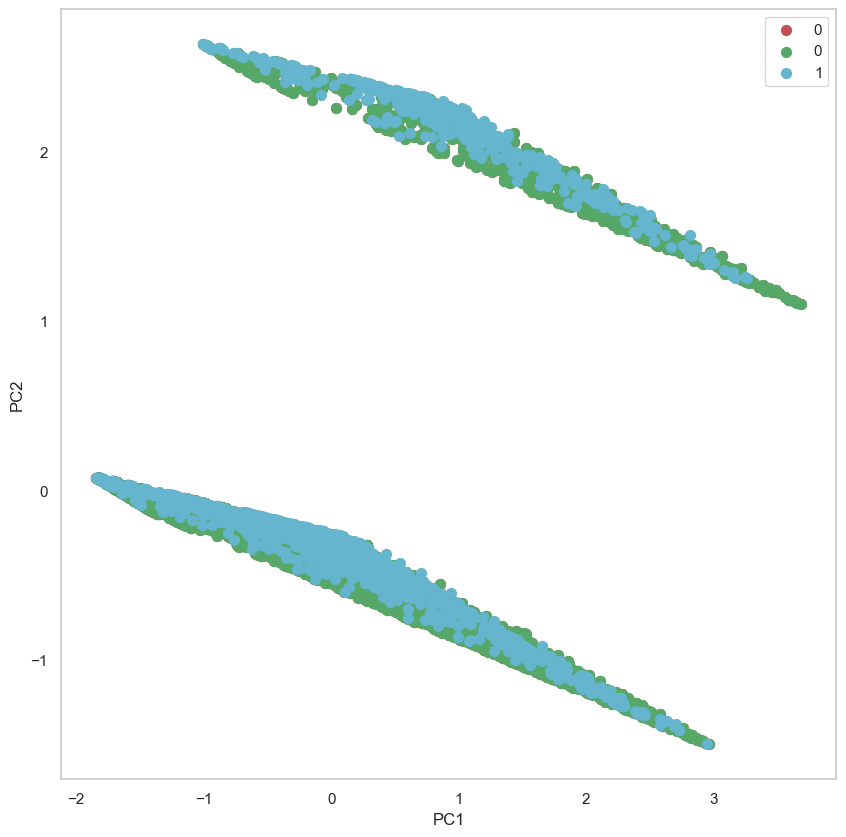

In [84]:
#Let's also visualize the outcome of the PCA.

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
targets = X_data['Churn']
colors = ['r', 'g', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = new_df['Churn'] == target
    ax.scatter(new_df.loc[indicesToKeep, 'PC1']
               , new_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [85]:
X = np.array(X_data['Churn']).reshape(-1, 1)

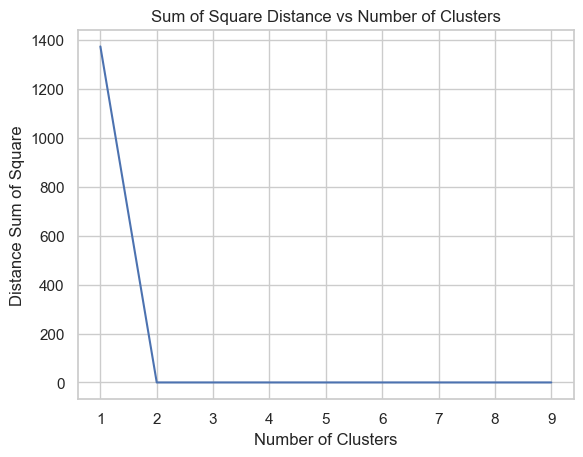

In [86]:
ss_distance = []
K = range(1, 10)
for clusters in K:
    K_means_clusters = KMeans(n_clusters = clusters, n_init=3, random_state = 25)
    K_means_clusters.fit(X)
    ss_distance.append(K_means_clusters.inertia_)

plt.title('Sum of Square Distance vs Number of Clusters')   
plt.plot(K, ss_distance)
plt.xlabel('Number of Clusters' ,fontsize='12')
plt.ylabel('Distance Sum of Square', fontsize='12')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=3, random_state=0)
X_data['labels'] = kmeans.fit_predict(X)
X_data

SeniorCitizen tenure Range  MonthlyCharges  TotalCharges  Churn  labels
0                 0          0-4           29.85         29.85      0       2
1                 0        30-34           56.95       1889.50      0       2
2                 0          0-4           53.85        108.15      1       1
3                 0        40-44           42.30       1840.75      0       2
4                 0          0-4           70.70        151.65      1       1
...             ...          ...             ...           ...    ...     ...
7038              0        20-24           84.80       1990.50      0       2
7039              0        70-74          103.20       7362.90      0       2
7040              0        10-14           29.60        346.45      0       2
7041              1          0-4           74.40        306.60      1       1
7042              0        65-69          105.65       6844.50      0       2

[7043 rows x 6 columns]

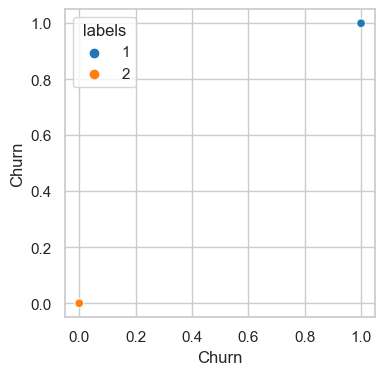

In [88]:
plt.figure(figsize=(4,4),dpi=100)
sns.scatterplot(data=X_data, x=X_data['Churn'],y=X_data['Churn'],hue=X_data['labels'] ,palette='tab10')
plt.show()

In [89]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
dbs = davies_bouldin_score(X, cluster_labels)

print('Silhouette score =', silhouette_avg)
print('Davies Bouldin score =', dbs)

Silhouette score = 1.0
Davies Bouldin score = 0.0


In [90]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ClusterNode

In [91]:
matrix_linkage = hierarchy.linkage(kmeans.cluster_centers_) # hierarchy is used to obtain the clusters
matrix_linkage # distances between the points 

array([[0.0000000e+00, 2.0000000e+00, 2.0539126e-15, 2.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 1.0000000e+00, 3.0000000e+00]])

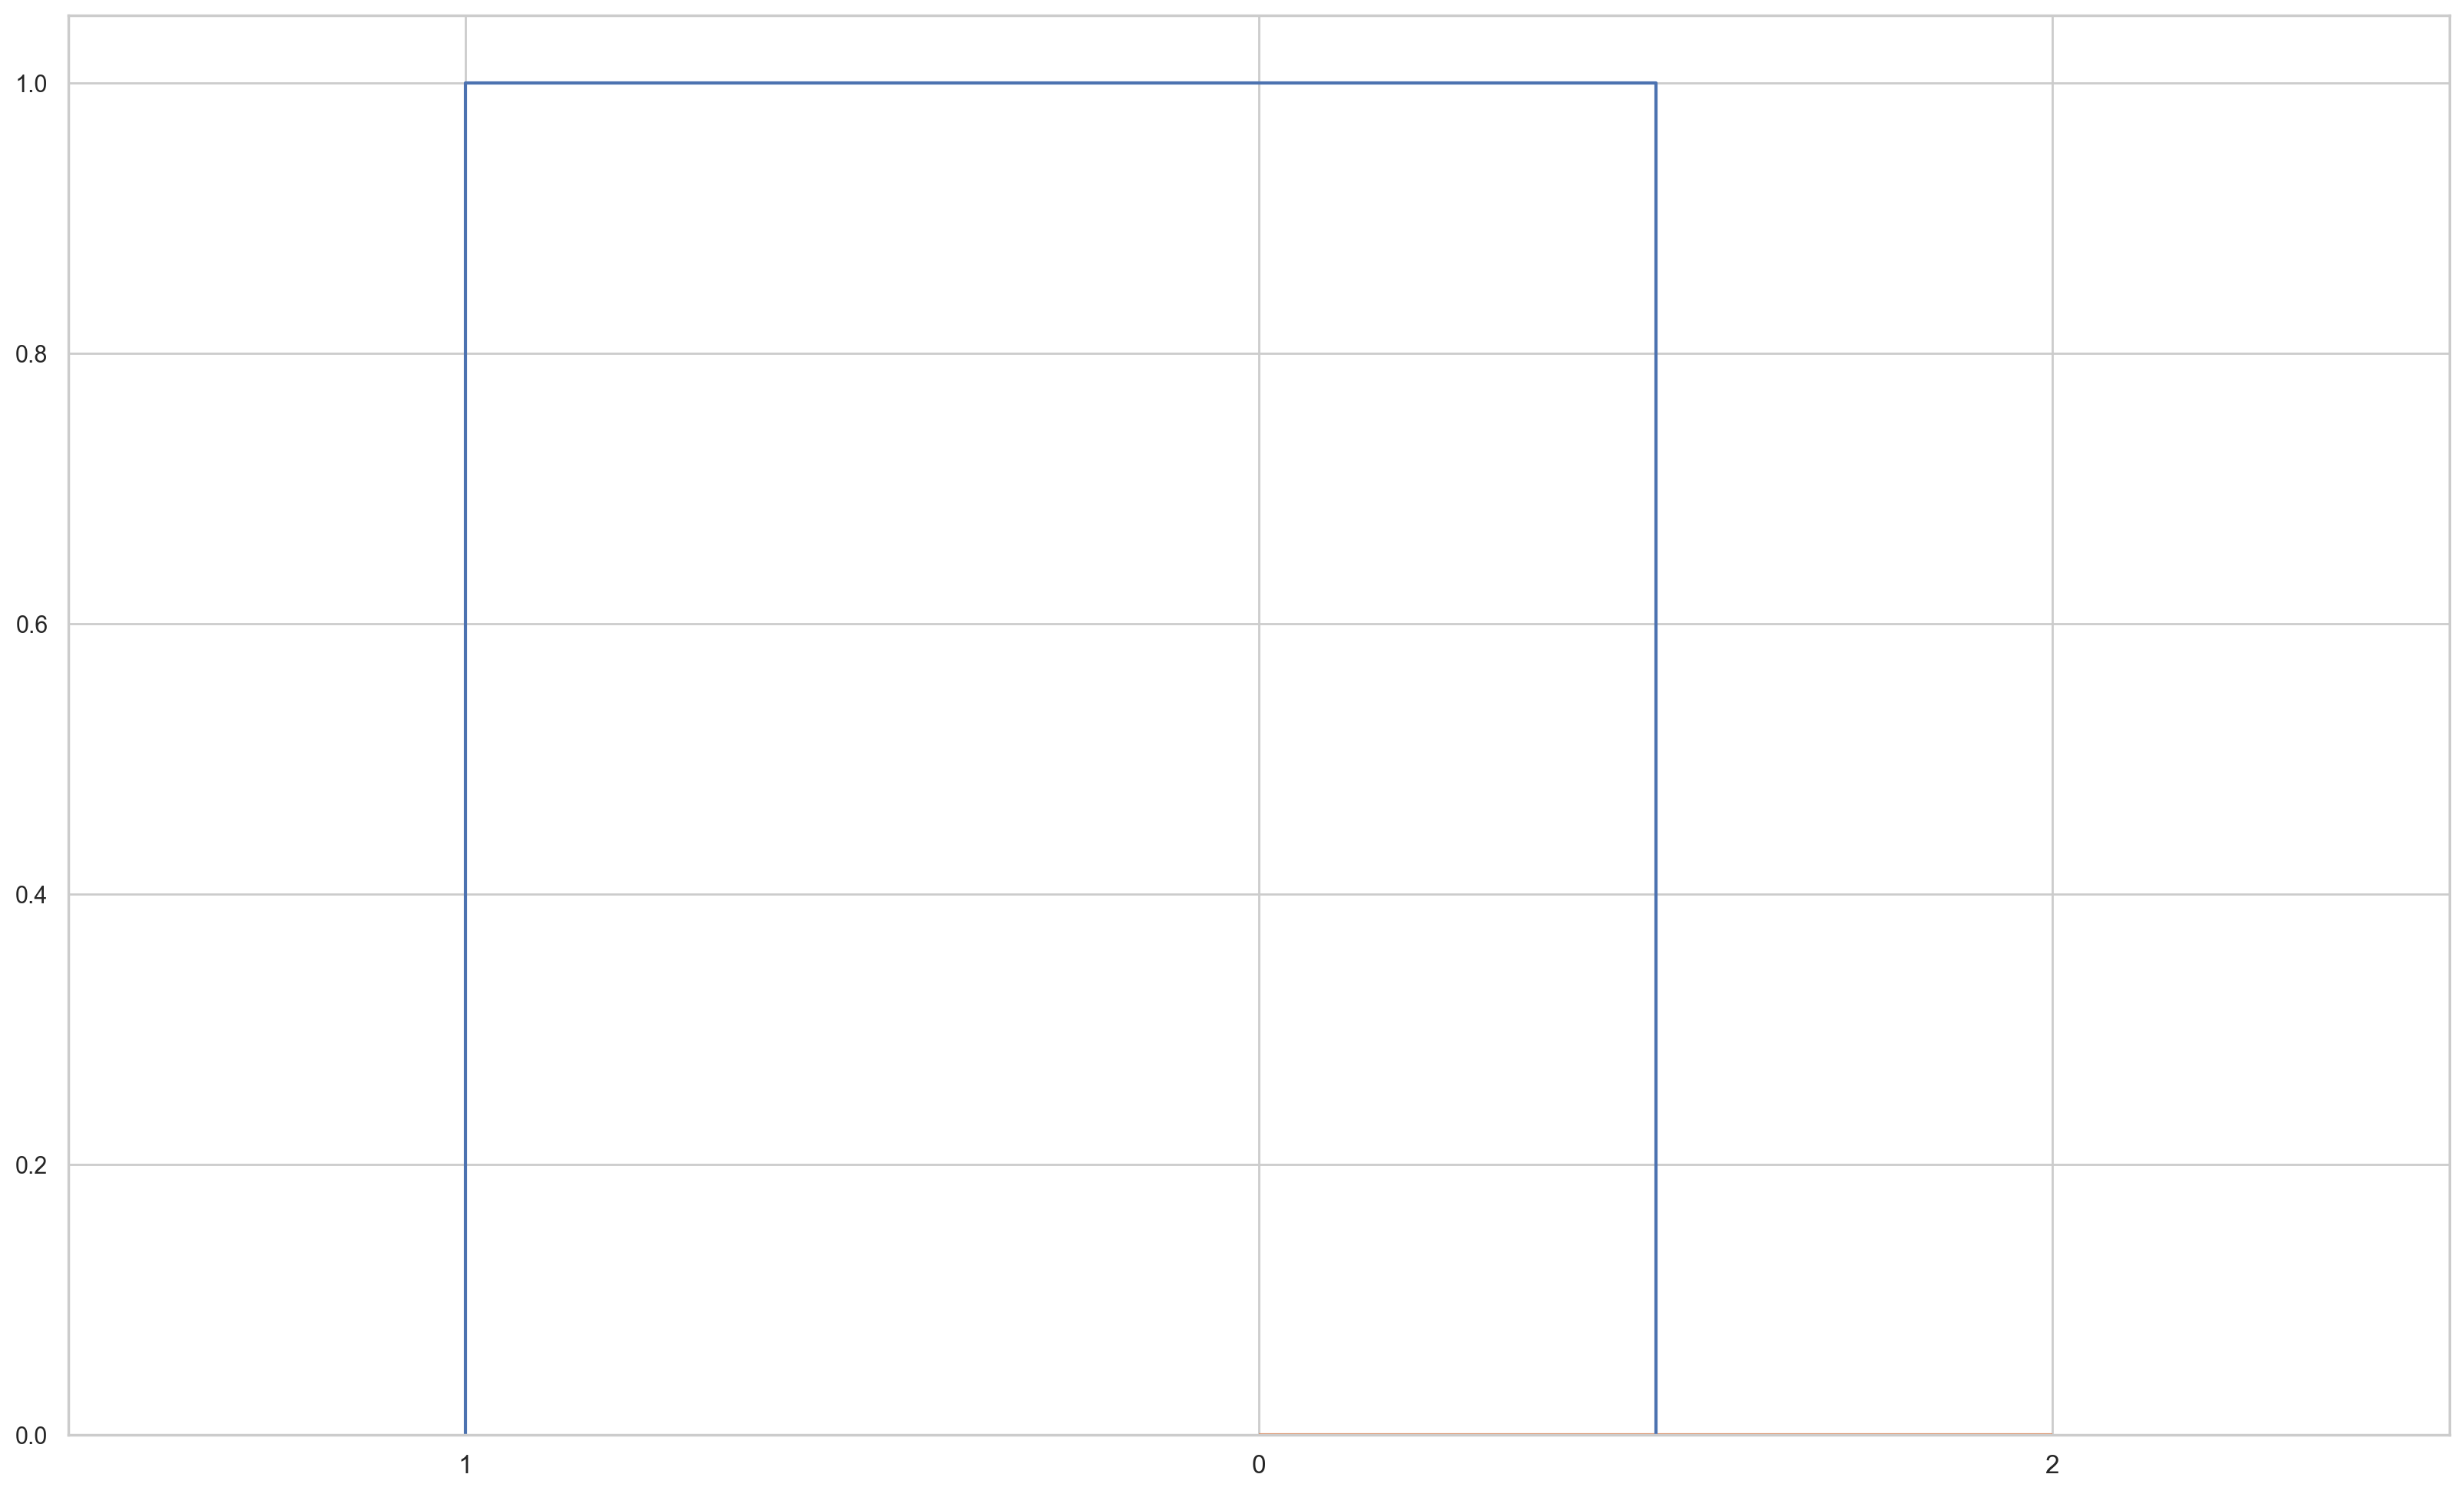

In [92]:
plt.figure(figsize=(20,12), dpi = 200,)
dendrogram(Z=matrix_linkage,truncate_mode= 'level', p= 7);

### TASK 4 SUPERVISED MACHINE LEARNING

In [93]:
numeric = df_churn.select_dtypes(exclude = 'object')
objects = df_churn.select_dtypes(include = 'object')

In [94]:
numeric= numeric.drop('tenure Range', axis=1)
numeric.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
0              0       1           29.85         29.85      0
1              0      34           56.95       1889.50      0
2              0       2           53.85        108.15      1
3              0      45           42.30       1840.75      0
4              0       2           70.70        151.65      1

In [95]:
objects.head()

customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  
0           Electronic check  
1               Mailed check  
2               Mailed check  
3  Bank transfer (automatic)  
4           Electronic check

In [96]:
df_churn['Churn'].unique()

array([0, 1])

<AxesSubplot: xlabel='Churn', ylabel='count'>

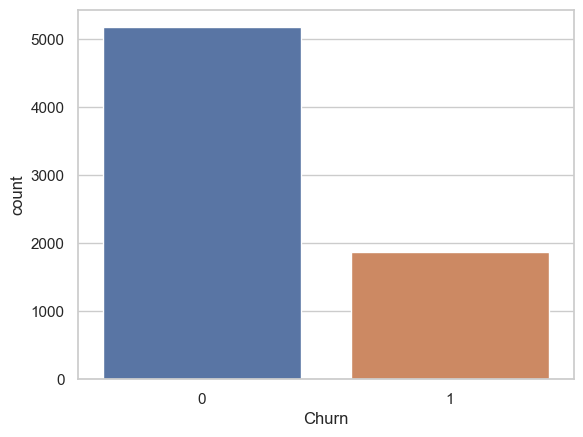

In [97]:
sns.countplot(data=df_churn, x='Churn')

<AxesSubplot: >

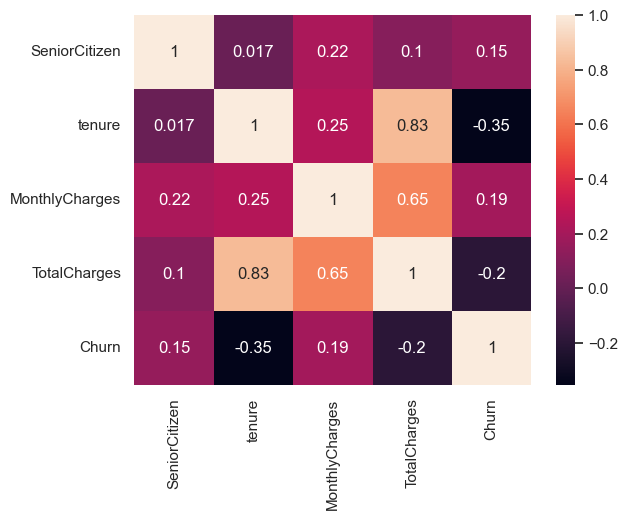

In [98]:
sns.heatmap(numeric.corr(), annot=True)

In [99]:
# Apply LabelEncoder to each object column
encoded_objects = pd.DataFrame()
for column in objects.columns:
    enc = LabelEncoder()
    encoded_objects[column] = enc.fit_transform(objects[column])

# Combine the numeric and encoded object DataFrames
combined_df = pd.concat([numeric, encoded_objects], axis=1)

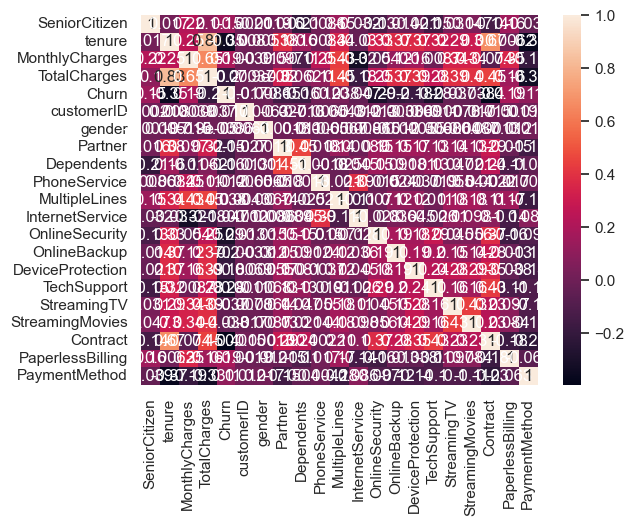

In [100]:
sns.heatmap(combined_df.corr(), annot=True)
plt.show()

In [101]:
# Assuming 'Churn' is the column you want to analyze
target_column = 'Churn'

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Extract correlations with the target column
correlations_with_target = correlation_matrix[target_column].drop(target_column)

# Identify positively and negatively correlated variables
positively_correlated = correlations_with_target[correlations_with_target > 0].index
negatively_correlated = correlations_with_target[correlations_with_target < 0].index

In [102]:
# Print positively and negatively correlated variables
print("Positively correlated variables:")
print(positively_correlated)

Positively correlated variables:
Index(['SeniorCitizen', 'MonthlyCharges', 'PhoneService', 'MultipleLines',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [103]:
print("\nNegatively correlated variables:")
print(negatively_correlated)


Negatively correlated variables:
Index(['tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract'],
      dtype='object')


<AxesSubplot: >

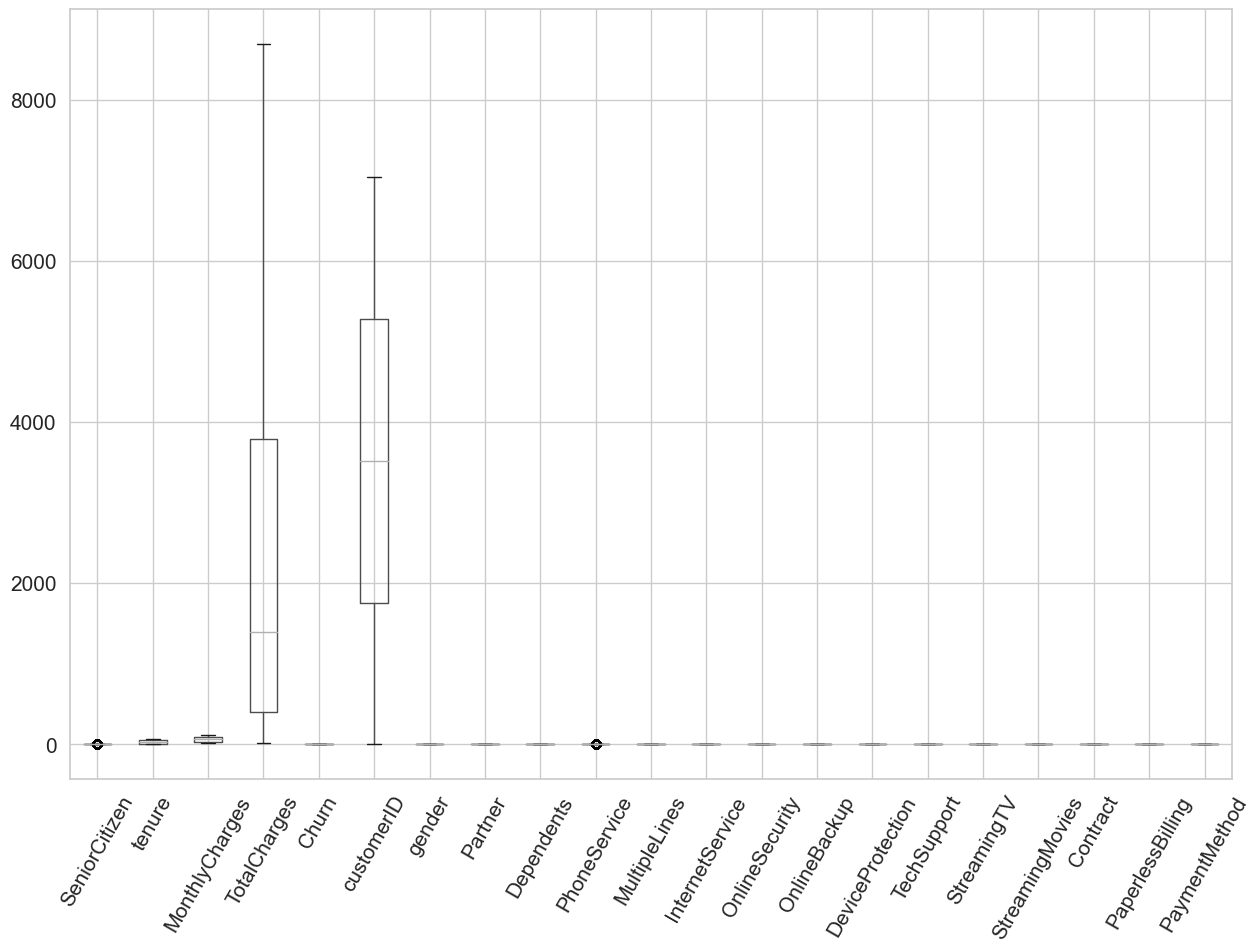

In [104]:
combined_df.boxplot(figsize = (15,10), fontsize = 15, rot = 60)

## Building the Model

In [105]:
from sklearn.model_selection import train_test_split

X = combined_df.drop('Churn',axis=1)
y = combined_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = X_train
y= y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

## Normalizing the Dataset

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)
scaled_Xval = scaler.transform(X_val)
Xtrain_df = pd.DataFrame(scaled_Xtrain, columns = X_train.columns)
Xtest_df = pd.DataFrame(scaled_Xtest, columns = X_test.columns)
Xval_df = pd.DataFrame(scaled_Xval, columns = X_val.columns)

## Simple Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cont_variables = Xtrain_df[['SeniorCitizen', 'MonthlyCharges', 'PhoneService', 'MultipleLines',
       'PaperlessBilling', 'PaymentMethod']]
for col in cont_variables.columns:
    lm = LinearRegression()
    col_xtrain = Xtrain_df[col].to_numpy().reshape(-1,1)
    col_xval = Xval_df[col].to_numpy().reshape(-1,1)
    lm.fit(col_xtrain, y_train)
    y_pred = lm.predict(col_xval)
    r2 = r2_score(y_val, y_pred)
    mean_abs_err = mean_absolute_error(y_val, y_pred)
    mean_sqr_err = mean_squared_error(y_val, y_pred)
    root_mean_sqr = np.sqrt(mean_sqr_err)
    print(f"{col}")
    print(f"Mean Absolute Error: {mean_abs_err:.2f}")
    print(f"Root Mean Square Error: {root_mean_sqr:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print('\n')

SeniorCitizen
Mean Absolute Error: 0.39
Root Mean Square Error: 0.45
R2 Score: 0.02


MonthlyCharges
Mean Absolute Error: 0.38
Root Mean Square Error: 0.45
R2 Score: 0.03


PhoneService
Mean Absolute Error: 0.40
Root Mean Square Error: 0.45
R2 Score: -0.00


MultipleLines
Mean Absolute Error: 0.40
Root Mean Square Error: 0.45
R2 Score: -0.00


PaperlessBilling
Mean Absolute Error: 0.38
Root Mean Square Error: 0.45
R2 Score: 0.02


PaymentMethod
Mean Absolute Error: 0.39
Root Mean Square Error: 0.45
R2 Score: 0.01




## USING ALL VARIABLES TO PREDICT CHURN

In [108]:
X = combined_df.drop('Churn', axis=1)
y = combined_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = X_train
y= y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [109]:
scaler = MinMaxScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)
scaled_Xval = scaler.transform(X_val)
Xtrain_df = pd.DataFrame(scaled_Xtrain, columns = X_train.columns)
Xtest_df = pd.DataFrame(scaled_Xtest, columns = X_test.columns)
Xval_df = pd.DataFrame(scaled_Xval, columns = X_val.columns)

In [110]:
lm = LinearRegression()
lm.fit(Xtrain_df, y_train)
y_pred = lm.predict(Xval_df)
r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

In [111]:
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

R2 Score: 0.23
Mean Absolute Error: 0.32
Root Mean Square Error: 0.39


#### For the Negative Correlation

In [112]:
corr = combined_df[['Churn','tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract']].corr()
corr

Churn    tenure  TotalCharges  customerID    gender  \
Churn             1.000000 -0.352229     -0.198335   -0.017447 -0.008612   
tenure           -0.352229  1.000000      0.826172    0.008035  0.005106   
TotalCharges     -0.198335  0.826172      1.000000    0.000371 -0.000079   
customerID       -0.017447  0.008035      0.000371    1.000000  0.006288   
gender           -0.008612  0.005106     -0.000079    0.006288  1.000000   
Partner          -0.150448  0.379697      0.317518   -0.026729 -0.001808   
Dependents       -0.164221  0.159712      0.062100   -0.012823  0.010517   
InternetService  -0.047291 -0.030359     -0.175753   -0.012407 -0.000863   
OnlineSecurity   -0.289309  0.325468      0.253235    0.013292 -0.015017   
OnlineBackup     -0.195525  0.370876      0.374421   -0.003334 -0.012057   
DeviceProtection -0.178134  0.371105      0.387908   -0.006918  0.000549   
TechSupport      -0.282492  0.322942      0.275637    0.001140 -0.006825   
StreamingTV      -0.036581  0.289373      0.391480   -0.007777 -0.006421   
StreamingMovies  -0.038492  0.296866      0.398067   -0.016746 -0.008743   
Contract         -0.396713  0.671607      0.446882    0.015028  0.000126   

                   Partner  Dependents  InternetService  OnlineSecurity  \
Churn            -0.150448   -0.164221        -0.047291       -0.289309   
tenure            0.379697    0.159712        -0.030359        0.325468   
TotalCharges      0.317518    0.062100        -0.175753        0.253235   
customerID       -0.026729   -0.012823        -0.012407        0.013292   
gender           -0.001808    0.010517        -0.000863       -0.015017   
Partner           1.000000    0.452676         0.000891        0.150828   
Dependents        0.452676    1.000000         0.044590        0.152166   
InternetService   0.000891    0.044590         1.000000       -0.028416   
OnlineSecurity    0.150828    0.152166        -0.028416        1.000000   
OnlineBackup      0.153130    0.091015         0.036138        0.185126   
DeviceProtection  0.166330    0.080537         0.044944        0.175985   
TechSupport       0.126733    0.133524        -0.026047        0.285028   
StreamingTV       0.137341    0.046885         0.107417        0.044669   
StreamingMovies   0.129574    0.021321         0.098350        0.055954   
Contract          0.294806    0.243187         0.099721        0.374416   

                  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn                -0.195525         -0.178134    -0.282492    -0.036581   
tenure                0.370876          0.371105     0.322942     0.289373   
TotalCharges          0.374421          0.387908     0.275637     0.391480   
customerID           -0.003334         -0.006918     0.001140    -0.007777   
gender               -0.012057          0.000549    -0.006825    -0.006421   
Partner               0.153130          0.166330     0.126733     0.137341   
Dependents            0.091015          0.080537     0.133524     0.046885   
InternetService       0.036138          0.044944    -0.026047     0.107417   
OnlineSecurity        0.185126          0.175985     0.285028     0.044669   
OnlineBackup          1.000000          0.187757     0.195748     0.147186   
DeviceProtection      0.187757          1.000000     0.240593     0.276652   
TechSupport           0.195748          0.240593     1.000000     0.161305   
StreamingTV           0.147186          0.276652     0.161305     1.000000   
StreamingMovies       0.136722          0.288799     0.161316     0.434772   
Contract              0.280980          0.350277     0.425367     0.227116   

                  StreamingMovies  Contract  
Churn                   -0.038492 -0.396713  
tenure                   0.296866  0.671607  
TotalCharges             0.398067  0.446882  
customerID              -0.016746  0.015028  
gender                  -0.008743  0.000126  
Partner                  0.129574  0.294806  
Dependents               0.02132

##### For the positive Correlations

In [113]:
corre = combined_df[['Churn','SeniorCitizen', 'MonthlyCharges', 'PhoneService', 'MultipleLines',
       'PaperlessBilling', 'PaymentMethod']].corr()
corre

Churn  SeniorCitizen  MonthlyCharges  PhoneService  \
Churn             1.000000       0.150889        0.193356      0.011942   
SeniorCitizen     0.150889       1.000000        0.220173      0.008576   
MonthlyCharges    0.193356       0.220173        1.000000      0.247398   
PhoneService      0.011942       0.008576        0.247398      1.000000   
MultipleLines     0.038037       0.146185        0.433576     -0.020538   
PaperlessBilling  0.191825       0.156530        0.352150      0.016505   
PaymentMethod     0.107062      -0.038551       -0.193407     -0.004184   

                  MultipleLines  PaperlessBilling  PaymentMethod  
Churn                  0.038037          0.191825       0.107062  
SeniorCitizen          0.146185          0.156530      -0.038551  
MonthlyCharges         0.433576          0.352150      -0.193407  
PhoneService          -0.020538          0.016505      -0.004184  
MultipleLines          1.000000          0.165146      -0.176793  
PaperlessBilling       0.165146          1.000000      -0.062904  
PaymentMethod         -0.176793         -0.062904       1.000000

In [114]:
#FOR THE VARIABLES WITH NEGATIVE CORRELATION
sub_Xtrain = Xtrain_df[['tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract']]
sub_Xtest = Xtest_df[['tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract']]
sub_Xval = Xval_df[['tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract']]

lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xval)

r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f"Results when 'Partner', 'Dependents','OnlineSecurity',\n"
      f"'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',\n"
      f"'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'\n"
      f"are considered as categorical variables:\n")
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

Results when 'Partner', 'Dependents','OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
are considered as categorical variables:

R2 Score: 0.20
Mean Absolute Error: 0.34
Root Mean Square Error: 0.40


In [115]:
sub_Xtrain = Xtrain_df[['SeniorCitizen','MonthlyCharges','PaperlessBilling']]
sub_Xtest = Xtest_df[['SeniorCitizen','MonthlyCharges','PaperlessBilling']]
sub_Xval = Xval_df[['SeniorCitizen','MonthlyCharges','PaperlessBilling']]

lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xval)

r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f"Results when 'SeniorCitizen','MonthlyCharges' were used:")
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

Results when 'SeniorCitizen','MonthlyCharges' were used:
R2 Score: 0.05
Mean Absolute Error: 0.37
Root Mean Square Error: 0.44


## Testing

In [116]:
lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xtest)

r2 = r2_score(y_test, y_pred)
mean_abs_err = mean_absolute_error(y_test, y_pred)
mean_sqr_err = mean_squared_error(y_test, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

R2 Score: 0.07
Mean Absolute Error: 0.36
Root Mean Square Error: 0.42


<AxesSubplot: title={'center': 'CUSTOMER CHURN ANALYSIS'}, xlabel='MonthlyCharges', ylabel='Churn'>

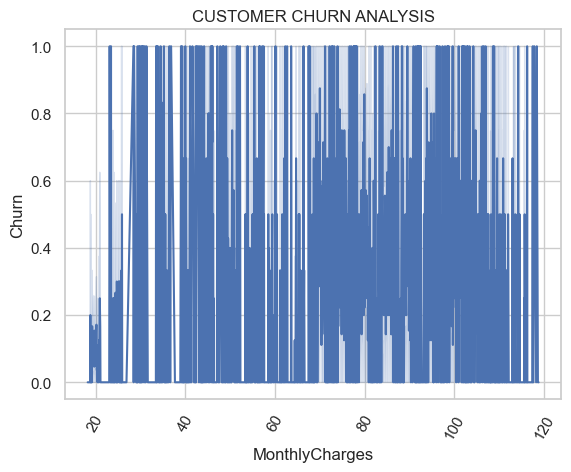

In [117]:
plt.title('CUSTOMER CHURN ANALYSIS')
plt.xticks(rotation=60)
sns.lineplot(data=combined_df, x='MonthlyCharges', y='Churn')

### FURTHER CLASSIFICATION

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report,
 confusion_matrix, ConfusionMatrixDisplay, roc_auc_score)

In [119]:
X = combined_df.drop(columns=['tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract','Churn'])
                      
y = combined_df['Churn']

In [120]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=21, k_neighbors = 2) 
X_sm, y_sm = sm.fit_resample(X, y) 
X, y = X_sm, y_sm

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [122]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       832
           1       0.72      0.72      0.72       824

    accuracy                           0.72      1656
   macro avg       0.72      0.72      0.72      1656
weighted avg       0.72      0.72      0.72      1656



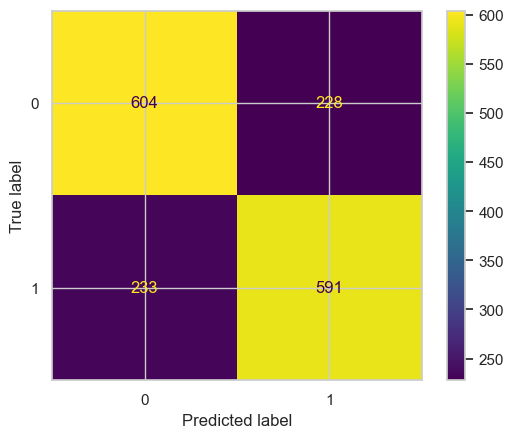

Support Vector
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       832
           1       0.67      0.64      0.65       824

    accuracy                           0.66      1656
   macro avg       0.66      0.66      0.66      1656
weighted avg       0.66      0.66      0.66      1656



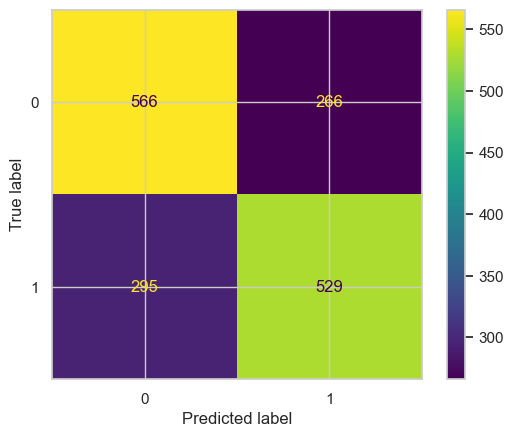

Random Forest
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       832
           1       0.72      0.76      0.74       824

    accuracy                           0.73      1656
   macro avg       0.73      0.73      0.73      1656
weighted avg       0.73      0.73      0.73      1656



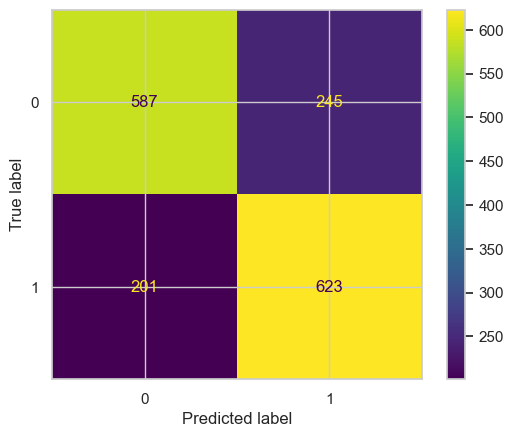

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       832
           1       0.61      0.69      0.65       824

    accuracy                           0.63      1656
   macro avg       0.63      0.63      0.63      1656
weighted avg       0.63      0.63      0.63      1656



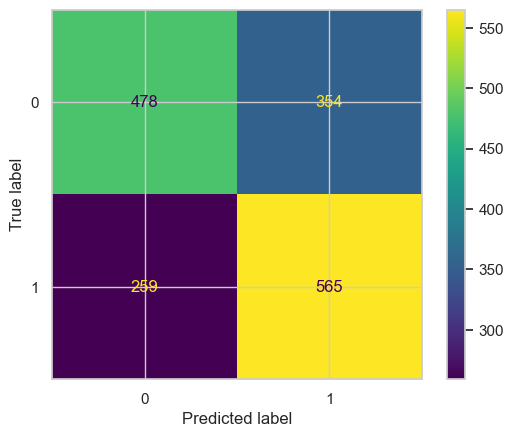

K Neighbors
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       832
           1       0.69      0.80      0.74       824

    accuracy                           0.72      1656
   macro avg       0.72      0.72      0.72      1656
weighted avg       0.72      0.72      0.72      1656



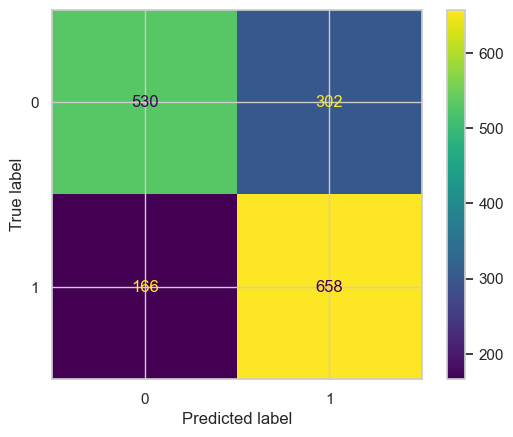

In [123]:
models = [('Decision Tree', DecisionTreeClassifier()), ('Support Vector', SVC()),
         ('Random Forest', RandomForestClassifier()),('Logistic Regression', LogisticRegression()), 
          ('K Neighbors', KNeighborsClassifier())]
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    print(name)
    print(classification_report(y_val,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_val_scaled, y_val)
    plt.show()

###### Using Cross Validation to ensure there was no overfitting

In [124]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models:
    kfold = KFold(n_splits = 7)
    cross_val = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'{name}: {cross_val.mean():.2f} mean accuracy, {cross_val.std():.2f} standard deviation')   

Decision Tree: 0.72 mean accuracy, 0.01 standard deviation
Support Vector: 0.61 mean accuracy, 0.01 standard deviation
Random Forest: 0.74 mean accuracy, 0.01 standard deviation
Logistic Regression: 0.64 mean accuracy, 0.02 standard deviation
K Neighbors: 0.72 mean accuracy, 0.01 standard deviation


In [125]:
X = combined_df.drop(columns=['tenure', 'TotalCharges', 'customerID', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract','Churn','PhoneService', 'MultipleLines'])
                      
y = combined_df['Churn']

In [126]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=21, k_neighbors = 2) 
X_sm, y_sm = sm.fit_resample(X, y) 
X, y = X_sm, y_sm

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [128]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       832
           1       0.72      0.68      0.70       824

    accuracy                           0.71      1656
   macro avg       0.71      0.71      0.71      1656
weighted avg       0.71      0.71      0.71      1656



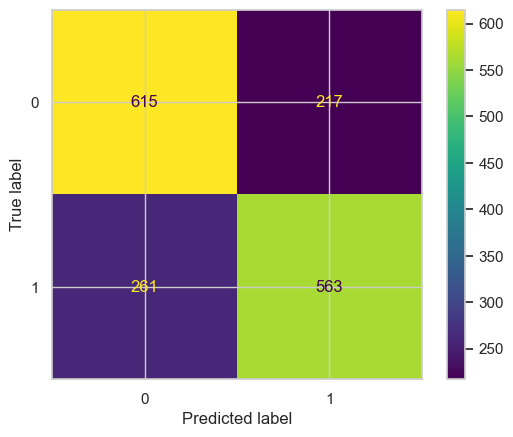

Support Vector
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       832
           1       0.66      0.65      0.65       824

    accuracy                           0.66      1656
   macro avg       0.66      0.66      0.66      1656
weighted avg       0.66      0.66      0.66      1656



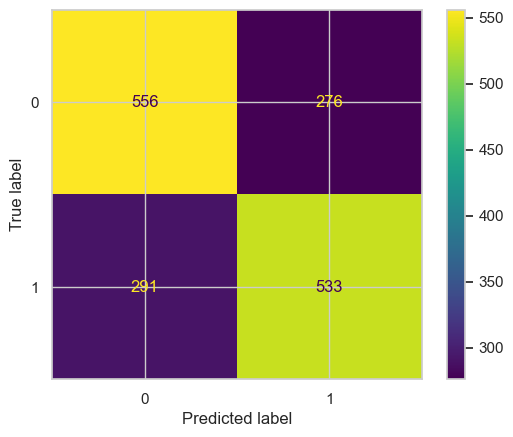

Random Forest
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       832
           1       0.72      0.73      0.73       824

    accuracy                           0.73      1656
   macro avg       0.73      0.73      0.73      1656
weighted avg       0.73      0.73      0.73      1656



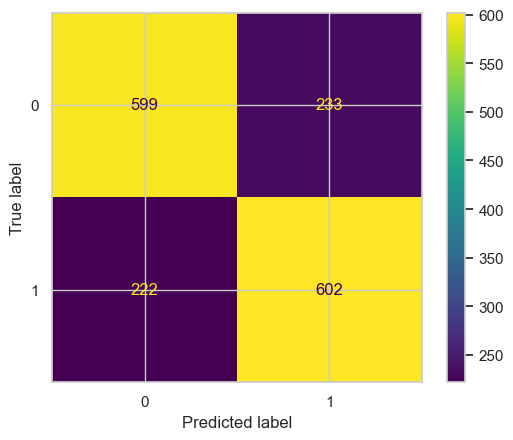

Logistic Regression
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       832
           1       0.60      0.66      0.63       824

    accuracy                           0.61      1656
   macro avg       0.62      0.61      0.61      1656
weighted avg       0.62      0.61      0.61      1656



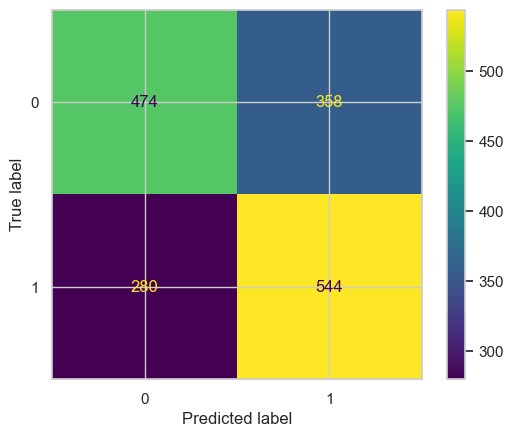

K Neighbors
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       832
           1       0.69      0.76      0.73       824

    accuracy                           0.71      1656
   macro avg       0.72      0.71      0.71      1656
weighted avg       0.72      0.71      0.71      1656



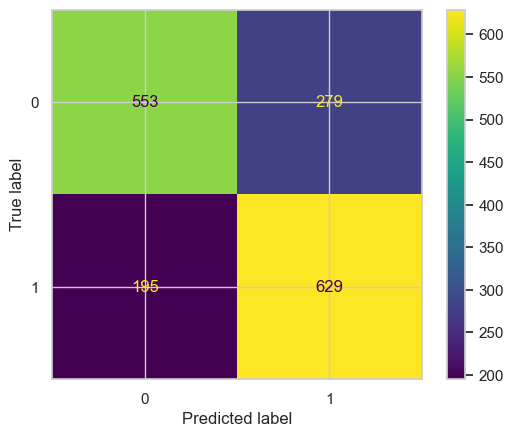

In [129]:
models = [('Decision Tree', DecisionTreeClassifier()), ('Support Vector', SVC()),
         ('Random Forest', RandomForestClassifier()),('Logistic Regression', LogisticRegression()), 
          ('K Neighbors', KNeighborsClassifier())]
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    print(name)
    print(classification_report(y_val,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_val_scaled, y_val)
    plt.show()

#### CROSS VALIDATION

In [130]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models:
    kfold = KFold(n_splits = 5)
    cross_val = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'{name}: {cross_val.mean():.2f} mean accuracy, {cross_val.std():.2f} standard deviation') 

Decision Tree: 0.72 mean accuracy, 0.01 standard deviation
Support Vector: 0.62 mean accuracy, 0.01 standard deviation
Random Forest: 0.73 mean accuracy, 0.01 standard deviation
Logistic Regression: 0.64 mean accuracy, 0.01 standard deviation
K Neighbors: 0.72 mean accuracy, 0.00 standard deviation
